# 5. FELADAT

A feladatsort Python nyelven kell megoldani a jupyter notebookban. Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat! Az előre megadott cellákon ne változtassunk!

# Időbeli folyamatok korrelációjának vizsgálata
Elmélet emlékeztető

Időbeli folyamatok vizsgálatakor érdekes kérdés, hogy két változó "mennyire egyszerre" változik, illetve a változások milyen időbeli eltolással követik egymást. Jelöljön $f(t)$ és $g(t)$ két folytonos, de időben diszkréten és véges módon mintavételezett folyamatot. A két folyamat keresztkorrelációs függvényét, mely a $\tau$ _időeltolás_ függvényében adja meg, hogy a két folyamat mennyire egyszerre változik, a következő módon definiálhatjuk:
$$
R_{fg}(\tau) = \sum_t f(t) \, g(t + \tau) = \sum_t f(t - \tau) g(t) \;.
$$
(Bővebben ld. az elméleti anyagban és az érdeklődőbbeknek: https://en.wikipedia.org/wiki/Cross-correlation)

Gyakran érdemes azt vizsgálni, hogy $f(t)$ és $g(t)$ az átlagukhoz képest mennyire térnek ki hasonlóan. 
Az átlagokat levonva az ún. kovariancia-függvényt kapjuk.
Ha pedig a kovariancia függvényt a két jel szórásával is lenormáljuk (ugyanis így egyező jelek esetén 1-et kapnánk), akkor kapjuk a normált korrelációs függvényt:
$$
K_{fg}(\tau) = \frac{1}{\sigma_f \sigma_g} \sum_t \left( f(t) - \mu_f \right) \left( g(t + \tau) - \mu_g \right)\;,
$$
ahol $\mu_f, \mu_g$ a két jel átlaga, $\sigma_f, \sigma_g$ pedig a szórásuk.

Belátható, hogy ha a folyamatokat csak egy időben véges intervallumon ismerjük, akkor a korrelációs függvényt csak egy véges hosszúságú $\tau < \tau_{\mathrm{max}}$ időablakkal érdemes meghatározni. A keresztkorrelációs függvény maximumának megkeresésével megtalálhatjuk azt az időeltolást, amely mellett a két időbeli folyamat a leginkább korrellál.

Amennyiben egy időbeli folyamat korrelációját nem egy másik folyamathoz, hanem saját magához képest vizsgáljuk, úgy  [autokorrelációról](https://en.wikipedia.org/wiki/Autocorrelation) illetve autokovarianciáról beszélünk. Belátható, hogy az autokorrelációs függvény páros, illetve hogy periodikus jelek autokorrelációja periodikus. Nem periodikus jelek esetében az autokorrelációs függvény $\tau = 0$-tól távolodva lecsengő. A lecsengés üteme függ a vizsgált folyamatoktól. Véletlenszerű zajok és kaotikusan viselkedő rendszerek (pontosabban a kaotikus rendszerek erősen keverő fajtája) esetében a lecsengés exponenciálisan gyors. Előfordulnak olyan kaotikus folyamatok is, ahol a korrelációk csak hatványfüggvény szerint csengenek le.

A keresztkorrelációs függvényhez nagyon hasonló módon definiáljuk diszkréten mintavételezett jelek [konvolúcióját](https://en.wikipedia.org/wiki/Convolution):
$$
f(t) \star g(t) = \sum_\tau f(\tau) \, g(t - \tau)
$$

Lineáris rendszerek esetében korábban már láttuk, hogy a konvolúció művelete segítségével igen könnyen meghatározható a rendszer válasza, ha a [Green-függvény](https://en.wikipedia.org/wiki/Green%27s_function) (impulzusválasz) ismert. A konvolúció művelet Fourier-térben szorzásnak felel meg:

$$
(f \star g)(\omega) = f(\omega) g(\omega)
$$

Az autokorrelációs függvény szintén érdekes kapcsolatban áll a Fourier-transzformációval. A [Wiener-Hincsin-tétel](https://en.wikipedia.org/wiki/Wiener–Khinchin_theorem) kimondja, hogy egy függvény autokorrelációs függvényének Fourier-transzformáltja megegyezik a függvény teljesítményspektrumával, azaz Fourier-transzformáltjának abszolút érték négyzetével:

$$
R_{ff}(\omega) = \left| f(\omega) \right|^2
$$

# Feladatok

## Alap 1. feladatrész - Korreláció, konvolúció

a) Írjunk olyan függvényeket, melyek a következő jelalakokat valósítják meg:

* egyetlen $T$ szélességű, $A$ amplitúdójú négyszögimpulzus (boxcar)
* egyetlen $T$ szélességű, $A$ amplitúdójú egyenlő szárú háromszögimpulzus (függőleges szimmetriatengellyel)
* egyetlen $T$ szélességű, $A$ amplitúdójú függőlegesen felfutó, ferdén lefutó háromszögimpulzus
* $T$ periódusidejú, $A$ amplitúdójú négyszögjel

Rajzoljuk fel a jeleket egy megfelelően mintavételezett időtartományon, majd határozzuk meg:

b) mindegyik jel autokorrelációját

c) mindegyik párra a keresztkorrelációját. Mit látunk, ha egy nem szimmetrikus eredménynél megcseréljük a két jelet?

d) mindegyik párra a konvolúciót egyik sorrendben. Mit látunk, ha egy nem szimmetrikus eredménynél megcseréljük a két jelet?

A feladat megvalósításához használjuk a `numpy.correlate` és `numpy.convolve` függvényeket.
A `numpy.correlate` alapértelmezésben a 'valid' üzemmódban működik, amikor csak annyi eltolást enged, aminél az egyik jel időtartama tartalmazza a másikét. Ezért vagy azt kell tennünk, hogy különböző szélességben mintavételezzük a két jelet, vagy a függvényleírásból kikeressük, hogyan lehet átállítani úgy, hogy egyforma szélességűekre is működjön. Az utóbbi esetben a széleffektus elkerülésére/csökkentésére legyen a mintavételezési tartomány elegendően nagy!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np

from scipy import signal

from scipy.fft import fft, fftshift

import matplotlib.pyplot as plt

In [3]:
# feladat megoldása
# a) rész
# jelalakok

In [4]:
def negyszogimpulzus(A, T, t, mintavetelezesrata):
    
    minta = int(T*mintavetelezesrata)
    jel = np.zeros(minta)
    kezdoindex = int((T-t)*mintavetelezesrata / 2)
    utolsoindex = kezdoindex + int(t* mintavetelezesrata)
    jel[kezdoindex: utolsoindex] = A
    
    return jel

In [5]:
amplitudo = 1
szelesseg = 10
idotartam = 3
mintavetelezesrata = 1000

In [6]:
signal = negyszogimpulzus(amplitudo, szelesseg, idotartam, mintavetelezesrata/szelesseg)

In [7]:
ido1 = np.linspace(0, idotartam, len(signal))

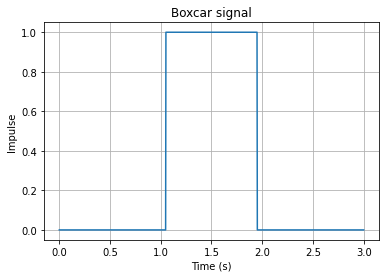

In [8]:
plt.plot(ido1, signal)
plt.xlabel('Time (s)')
plt.ylabel('Impulse')
plt.title('Boxcar signal')
plt.grid()

In [9]:
#A korreláció maximumát nullához várjuk.

window = signal.windows.boxcar(51)

plt.plot(window)

plt.title("Boxcar window")

plt.ylabel("Amplitude")

plt.xlabel("Sample")

In [10]:
import numpy as np

def haromszogjel(A, T, t, mintavetelezesrata):
    minta = int(T * mintavetelezesrata)
    ido = np.linspace(0, t, minta)
    felido = T / 2
    
    triangle_impulse = np.abs(((ido + felido) % T) - felido) - felido / 2
    
    # Ensure non-negative values by clipping at zero
    triangle_impulse = np.clip(triangle_impulse, 0, None)
    
    # Create an impulse by setting the peak value to 1
    #triangle_impulse[0] = 0
    
    return A * triangle_impulse




In [11]:
triangle_impulse = haromszogjel(4, 1, 1, mintavetelezesrata)

ido = np.linspace(0, idotartam, len(triangle_impulse))




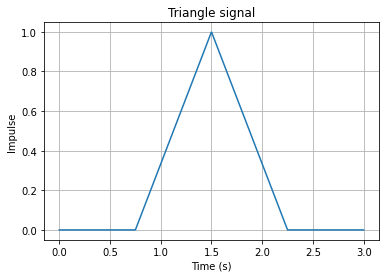

In [12]:
plt.plot(ido, triangle_impulse)
plt.xlabel('Time (s)')
plt.ylabel('Impulse')
plt.title('Triangle signal')
plt.grid()

In [13]:
len(triangle_impulse)

1000

In [14]:
import numpy as np

def inverted_triangle(length, amplitude):
    section = length // 4
    x = np.linspace(0, amplitude, section + 1)
    inverted_section = -1 * x[::-1]  # Invert the positive section
    zero = np.zeros(length - (2 * section))  # Adjust the length calculation
    impulse = np.concatenate((zero, inverted_section, zero[::-1]))

    impulse = impulse[:length]  # Trim the impulse to the desired length

    impulse = np.abs(impulse)

    return impulse

inverted_triangle_list = inverted_triangle(1000, 1)

ido3 = np.linspace(0, idotartam, len(inverted_triangle_list))

len(inverted_triangle_list)


1000

In [15]:
inverted_triangle_list = inverted_triangle(1000, 1)


ido3 = np.linspace(0, idotartam, len(inverted_triangle_list))


len(inverted_triangle_list)

1000

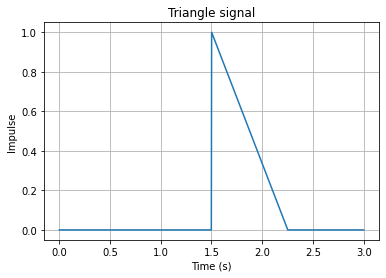

In [16]:
plt.plot(ido3, inverted_triangle_list)
plt.xlabel('Time (s)')
plt.ylabel('Impulse')
plt.title('Triangle signal')
plt.grid()

In [17]:
import numpy as np

def periodic_square_signal(A, T, t_list):
    # Create an empty list to store the square signal values
    square_signal_list = []
    
    # Iterate over each time value in the list
    for t in t_list:
        # Determine the time position within one period
        t_pos = t % T

        # Create a periodic square signal
        square_signal = 1 if t_pos < T/2 else -1
        
        # Add the scaled square signal value to the list
        square_signal_list.append(A * square_signal)
    
    return square_signal_list

    
    

In [18]:


square_signal = periodic_square_signal(1, 0.3, ido3)

len(ido3)



1000

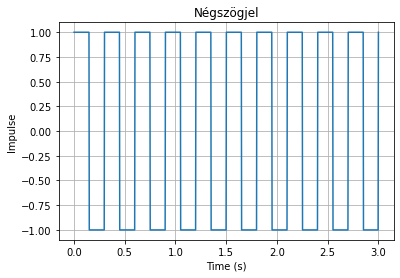

In [19]:
plt.plot(ido3, square_signal)
plt.xlabel('Time (s)')
plt.ylabel('Impulse')
plt.title('Négszögjel')
plt.grid()

Text(0, 0.5, 'Impulse')

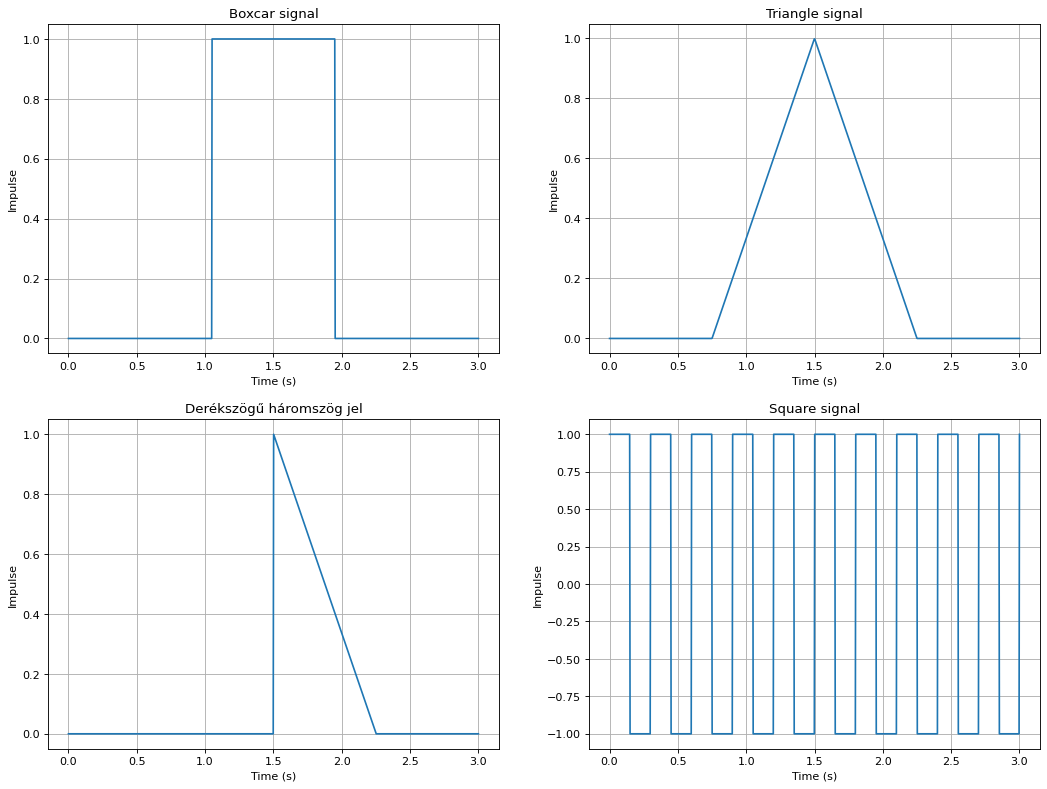

In [20]:
plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='r')  
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)

plt.subplot(2, 2, 1)
plt.xlabel('Time (s)')
plt.ylabel('Impulse')
plt.title('Boxcar signal')
plt.plot(ido1, signal)
plt.grid(True)



plt.subplot(2, 2, 2)
plt.title("Triangle signal")
plt.plot(ido, triangle_impulse)
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Impulse')


plt.subplot(2, 2, 3)
plt.title("Derékszögű háromszög jel")
plt.plot(ido3, inverted_triangle_list)
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Impulse')

plt.subplot(2, 2, 4)
plt.title("Square signal")
plt.plot(ido3, square_signal)
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Impulse')

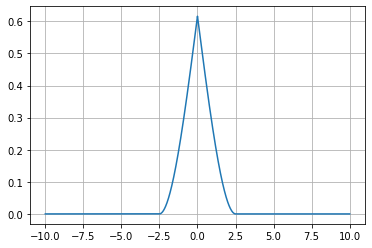

In [21]:
# b) rész
# autokorrelációk

triangle_signal_autocorr = np.correlate(inverted_triangle_list, inverted_triangle_list, mode="Full")
variancia_tri = np.var(inverted_triangle_list)
    
t = np.linspace(-10, 10, 1999)

ertek1 = triangle_signal_autocorr/(variancia_tri*triangle_signal_autocorr.size)

plt.plot(t, ertek1)
plt.grid()

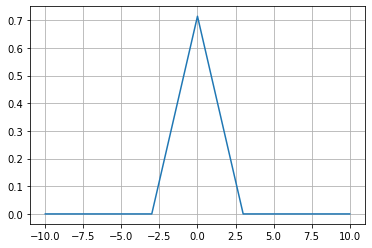

In [22]:
boxcar_signal_autocorr = np.correlate(signal, signal, mode="Full")
variancia_box = np.var(signal)

t = np.linspace(-10, 10, 1999)

ertek2 = boxcar_signal_autocorr/(variancia_box*boxcar_signal_autocorr.size)

plt.plot(t, ertek2)
plt.grid()


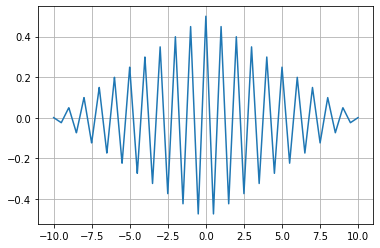

In [23]:
square_impulse_autocorr = np.correlate(square_signal, square_signal, mode="full")
variancia_sqr_imp = np.var(square_signal)


t_square_imp = np.linspace(-10, 10, 1999)

ertek3 = square_impulse_autocorr/(variancia_sqr_imp*square_impulse_autocorr.size)

plt.plot(t, ertek3)
plt.grid()

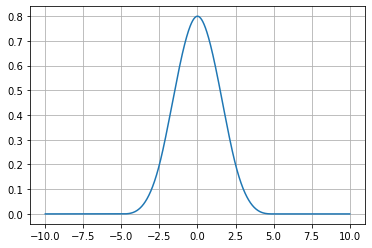

In [24]:
triangle_impulse_autocorr = np.correlate(triangle_impulse, triangle_impulse, mode="full")
variancia_tri_imp = np.var(triangle_impulse)

t_square_imp = np.linspace(-10, 10, 1999)


ertek4 = triangle_impulse_autocorr/(variancia_tri_imp*triangle_impulse_autocorr.size)

plt.plot(t, ertek4)
plt.grid()

Text(0, 0.5, 'Korreláció')

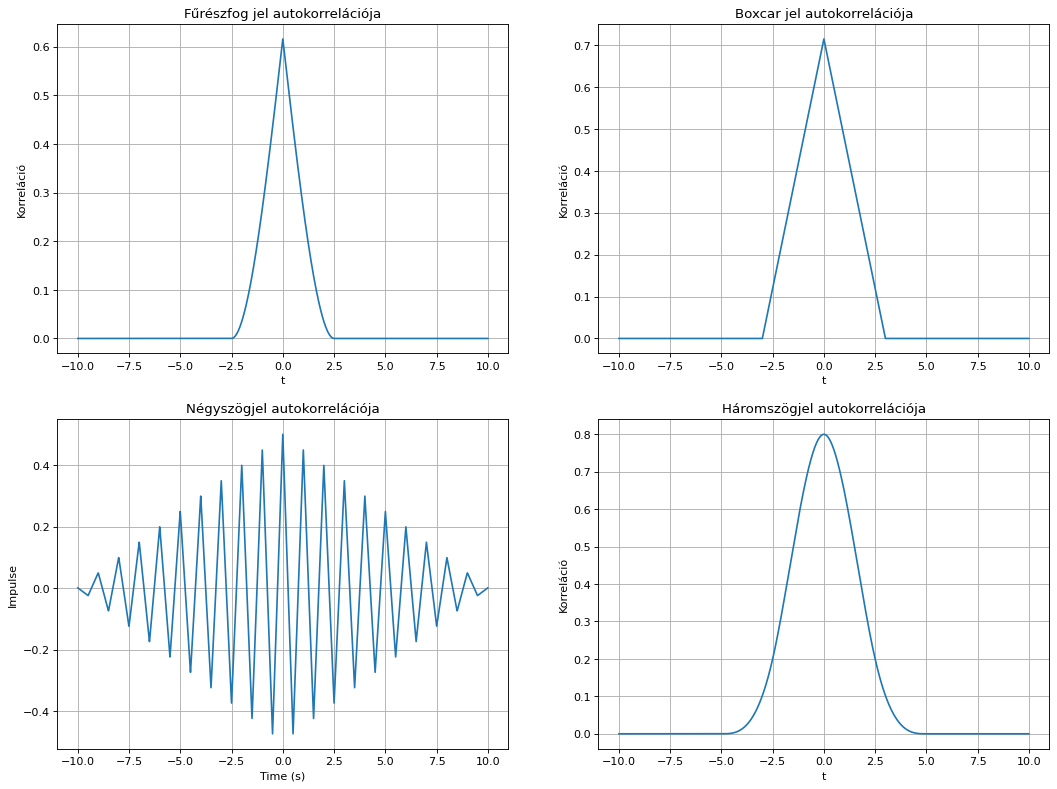

In [25]:
plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='r')  
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.2)

plt.subplot(2, 2, 1)
plt.xlabel('t')
plt.ylabel('Korreláció')
plt.title('Fűrészfog jel autokorrelációja')
plt.plot(t, ertek1)
plt.grid(True)



plt.subplot(2, 2, 2)
plt.title("Boxcar jel autokorrelációja")
plt.plot(t, ertek2)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Korreláció')


plt.subplot(2, 2, 3)
plt.title("Négyszögjel autokorrelációja")
plt.plot(t, ertek3)
plt.grid(True)
plt.xlabel('Time (s)')
plt.ylabel('Impulse')

plt.subplot(2, 2, 4)
plt.title("Háromszögjel autokorrelációja")
plt.plot(t, ertek4)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Korreláció')

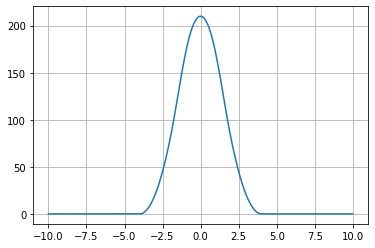

In [26]:
# c) rész
# keresztkorrelációk

boxcar_triangle_corr = np.correlate(signal, triangle_impulse, mode="Full")
t_boxcar = np.linspace(-10, 10, 1999)


plt.plot(t_boxcar, boxcar_triangle_corr)
plt.grid()

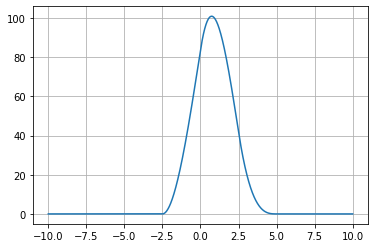

In [27]:
triangle_sawtooth_corr = np.correlate(inverted_triangle_list, triangle_impulse, mode="Full")
t_inv_tri = np.linspace(-10, 10, 1999)

plt.plot(t_inv_tri, triangle_sawtooth_corr)
plt.grid()


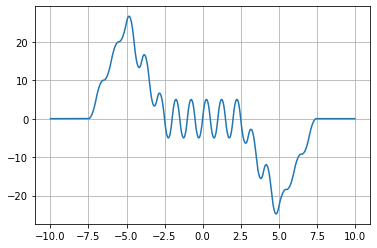

In [28]:
triangle_square_signal_autocorr = np.correlate(square_signal, triangle_impulse, mode="full")
t = np.linspace(-10, 10, 1999)

plt.plot(t, triangle_square_signal_autocorr)

plt.grid()

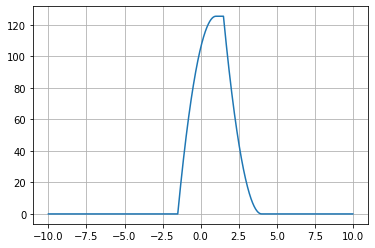

In [29]:
boxcar_sawtooth_corr = np.correlate(inverted_triangle_list, signal, mode="full")
t = np.linspace(-10, 10, 1999)


plt.plot(t, boxcar_sawtooth_corr)
plt.grid()


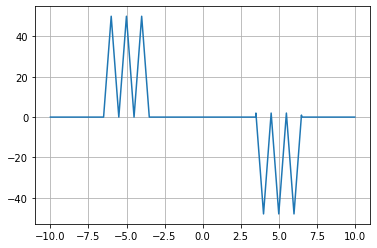

In [30]:
boxcar_square_signal_corr = np.correlate(square_signal, signal, mode="full")
t = np.linspace(-10, 10, 1999)


plt.plot(t, boxcar_square_signal_corr)
plt.grid()

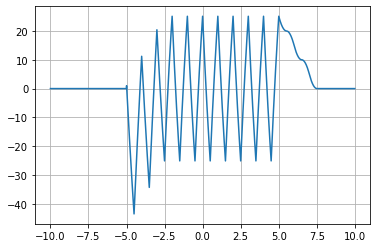

In [31]:
sawtooth_square_signal_corr = np.correlate(inverted_triangle_list, square_signal, mode="full")
t = np.linspace(-10, 10, 1999)

plt.plot(t, sawtooth_square_signal_corr)
plt.grid()

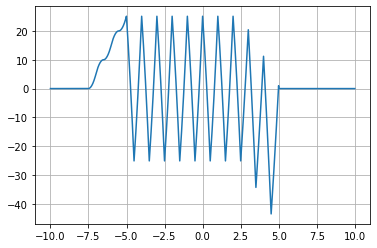

In [32]:
sawtooth_square_signal_corr2 = np.correlate(square_signal, inverted_triangle_list, mode="full")
t = np.linspace(-10, 10, 1999)

plt.plot(t, sawtooth_square_signal_corr2)
plt.grid()

In [33]:
#Amennyiben egy nem szimmetrikus jelnél megcseréljük a két jelet, az olyan, mintha egy tengelyes tükrözést hajtanánk végre,
#az eredményúl kapott jelet az y-tengelyre tükrözve a correlate függvénynek fordított sorrendben adtuk volna meg bemenetként a 
#két adatsort

Text(0, 0.5, 'Korreláció')

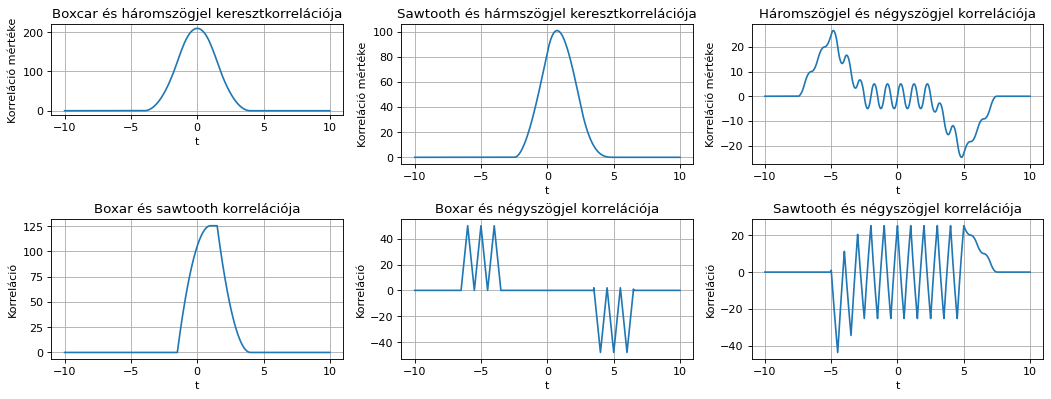

In [34]:
plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='r')  
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

plt.subplot(6, 3, 1)
plt.xlabel('t')
plt.ylabel('Korreláció mértéke')
plt.title('Boxcar és háromszögjel keresztkorrelációja')
plt.plot(t_boxcar, boxcar_triangle_corr)
plt.grid(True)



plt.subplot(4, 3, 2)
plt.title("Sawtooth és hármszögjel keresztkorrelációja")
plt.plot(t_inv_tri, triangle_sawtooth_corr)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Korreláció mértéke')


plt.subplot(4, 3, 3)
plt.title("Háromszögjel és négyszögjel korrelációja")
plt.plot(t, triangle_square_signal_autocorr)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Korreláció mértéke')

plt.subplot(4, 3, 4)
plt.title("Boxar és sawtooth korrelációja")
plt.plot(t, boxcar_sawtooth_corr)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Korreláció')


plt.subplot(4, 3, 5)
plt.title("Boxar és négyszögjel korrelációja")
plt.plot(t, boxcar_square_signal_corr)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Korreláció')



plt.subplot(4, 3, 6)
plt.title("Sawtooth és négyszögjel korrelációja")
plt.plot(t, sawtooth_square_signal_corr)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Korreláció')









In [35]:
# d) rész
# konvolúciók

Text(0.5, 1.0, 'Boxcar és háromszögjel konvolúciója')

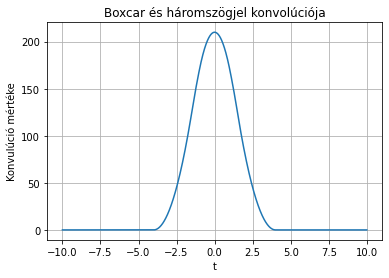

In [36]:
convolution_boxcar_triangle = np.convolve(signal, triangle_impulse)

t =  np.linspace(-10, 10, 1999)

plt.plot(t, convolution_boxcar_triangle)

plt.grid()
plt.xlabel('t')
plt.ylabel('Konvulúció mértéke')
plt.title('Boxcar és háromszögjel konvolúciója')

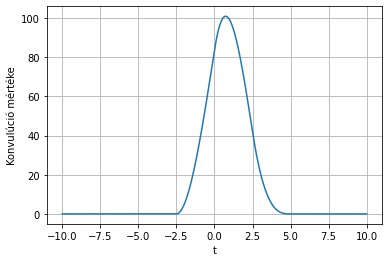

In [37]:
convolution_sawtooth_triangle = np.convolve(inverted_triangle_list, triangle_impulse)

t =  np.linspace(-10, 10, 1999)

plt.plot(t, convolution_sawtooth_triangle)
plt.xlabel('t')
plt.ylabel('Konvulúció mértéke')
plt.grid()


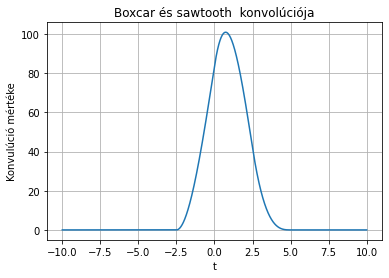

In [38]:
#A derékszögű háromszögjel és a háromszögjel konvolúcióját fordítva képezve:

convolution_sawtooth_triangle = np.convolve( triangle_impulse, inverted_triangle_list)

t =  np.linspace(-10, 10, 1999)

plt.plot(t, convolution_sawtooth_triangle)
plt.title("Boxcar és sawtooth  konvolúciója")

plt.xlabel('t')
plt.ylabel('Konvulúció mértéke')
plt.grid()

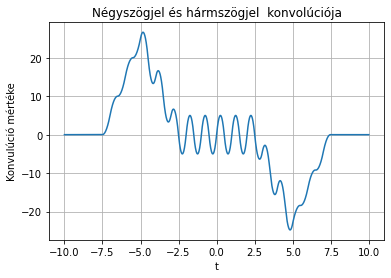

In [39]:
convolution_triangle_square = np.convolve( triangle_impulse, square_signal)

t =  np.linspace(-10, 10, 1999)

plt.plot(t, convolution_triangle_square)
plt.title("Négyszögjel és hármszögjel  konvolúciója")
plt.xlabel('t')
plt.ylabel('Konvulúció mértéke')
plt.grid()

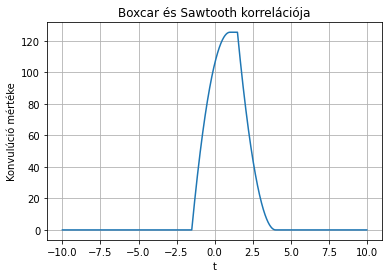

In [40]:
convolution_boxcar_sawtooth = np.convolve(signal, inverted_triangle_list)

t =  np.linspace(-10, 10, 1999)

plt.plot(t, convolution_boxcar_sawtooth)
plt.title("Boxcar és Sawtooth korrelációja")
plt.xlabel('t')
plt.ylabel('Konvulúció mértéke')
plt.grid()

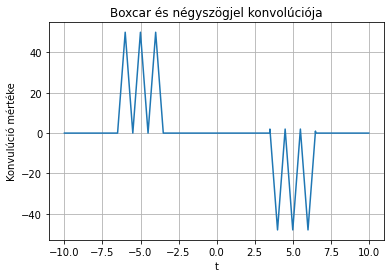

In [41]:
convolution_boxcar_square_signal = np.convolve(square_signal, signal)

t =  np.linspace(-10, 10, 1999)

plt.plot(t, convolution_boxcar_square_signal)
plt.title("Boxcar és négyszögjel konvolúciója")

plt.xlabel('t')
plt.ylabel('Konvulúció mértéke')
plt.grid()

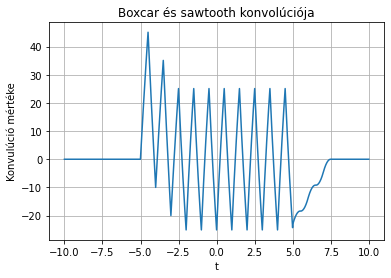

In [42]:
convolution_sawtooth_square_signal = np.convolve(square_signal, inverted_triangle_list)

t =  np.linspace(-10, 10, 1999)

plt.plot(t, convolution_sawtooth_square_signal)
plt.title("Boxcar és sawtooth konvolúciója")

plt.xlabel('t')
plt.ylabel('Konvulúció mértéke')
plt.grid()

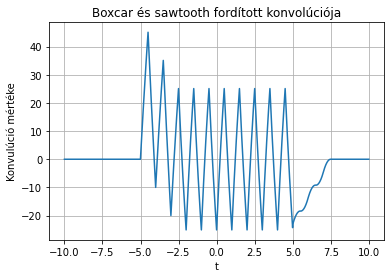

In [43]:
#Asszimetrikus jel esetén megcserélem a bemenetet:

convolution_square_signal_sawtooth = np.convolve( inverted_triangle_list, square_signal)

t =  np.linspace(-10, 10, 1999)

plt.plot(t, convolution_square_signal_sawtooth)
plt.title("Boxcar és sawtooth fordított konvolúciója")

plt.xlabel('t')
plt.ylabel('Konvulúció mértéke')
plt.grid()

In [44]:
#Ebben az esetben az eredmény nem változik, ugyan azt kapjuk, a konvolvált jel értéke nem változik.

Text(0, 0.5, 'Konvulúció mértéke')

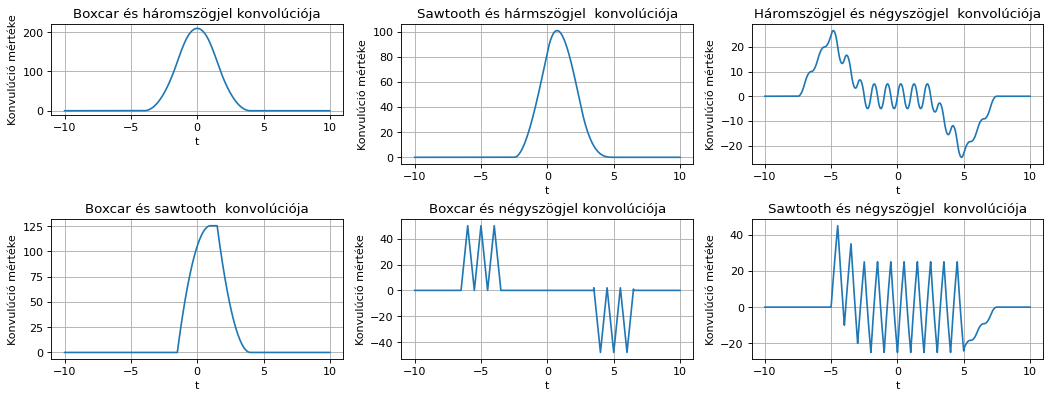

In [45]:
plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='r')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)

plt.subplot(6, 3, 1)
plt.xlabel('t')
plt.ylabel('Konvulúció mértéke')
plt.title('Boxcar és háromszögjel konvolúciója')
plt.plot(t, convolution_boxcar_triangle)
plt.grid(True)

plt.subplot(4, 3, 2)
plt.title("Sawtooth és hármszögjel  konvolúciója")
plt.plot(t, convolution_sawtooth_triangle)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Konvulúció mértéke')

plt.subplot(4, 3, 3)
plt.title("Háromszögjel és négyszögjel  konvolúciója")
plt.plot(t, convolution_triangle_square)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Konvulúció mértéke')

plt.subplot(4, 3, 4)
plt.title("Boxcar és sawtooth  konvolúciója")
plt.plot(t, convolution_boxcar_sawtooth)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Konvulúció mértéke')

plt.subplot(4, 3, 5)
plt.title("Boxcar és négyszögjel konvolúciója")
plt.plot(t, convolution_boxcar_square_signal)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Konvulúció mértéke')

plt.subplot(4, 3, 6)
plt.title("Sawtooth és négyszögjel  konvolúciója")
plt.plot(t, convolution_sawtooth_square_signal)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Konvulúció mértéke')


## Alap 2. feladatrész - Hold-radar kísérlet

Ebben és a következő feladatrészekben véletlenszerű folyamatokat fogunk vizsgálni és azt, hogy hogyan lehet ezek elemzésére felhasználni az előző feladatrészben tanultakat. 

Egy érdekes kísérlet, amiben véletlen folyamatnak, és a véletlen jelek statisztikus tulajdonságainak szerepe van, a Hold-radar kísérlet, melynek során a Holdról visszavert radarjeleket tudtak kimutatni.
(Ez néhány hét időkülönbséggel sikerült amerikai és magyar kutatóknak:
https://hu.wikipedia.org/wiki/Magyar_Hold-radar-kísérlet, https://en.wikipedia.org/wiki/Project_Diana)
A nehézség az volt, hogy a visszavert jel gyengesége miatt egyszerű módon nem tudták a vevők által fogott zajos jelből a visszevert jelet kiszűrni. A jelküldés sokszori ismétlésével és a felfogott jelek összegzésével azonban a jel felerősödött a zajhoz képest.

#### Feladat: 
Utánozzuk a Hold-radar kísérletet!
 Küldött jelként valamelyik impulzus jelünket válasszuk, azt egy $t_0$ időpontra eltolva!
Zajként vegyük a legegyszerűbb véletlen jelet, azaz egymás utáni időpillanatokban vett véletlen értékek sorozatát. Az értékek eloszlására a legtermészetesebb eloszlást, normál eloszlást válasszunk!
Felfogott jelként vegyük ezt a zajt, hozzáadva a kimenőjelet további késleltetéssel, és olyan kis amplitúdóval, hogy ábrázolásban ne legyen szemmel látható.

a) Mutassuk meg ábrán, hogy a felfogott jelen még nem látszik az impulzus. Másik ábrán mutassuk ki, hogy a "mérés" sokszori ismétlése és összegzése eredményeképpen az impulzus újra láthatóvá válik!

b) Próbáljuk ki azt is, hogy ha kiszámoljuk a kimenő jel és a felfogott jel korrelációs függvényét, az segít-e a jel jelenlétének kimutatásában! Tehát számoljuk ki és ábrázoljuk az összegzett felfogott jelnek a kimenő jellel vett korrelációs függvényét! Próbáljuk ki, mennyire lehet csökkenteni az ismétlések számát, esetleg el is lehet-e hagyni az ismétlést?

In [46]:
# a) Utánozzuk a Hold-radar kísérletet!

#amplitudo = 0.02


def haromszogjel_shift(amplitudo, T, t, mintavetelezesrata, timeshift):
    minta = int(T * mintavetelezesrata)
    ido = np.linspace(0, t, minta) + timeshift  # Apply time shift
    
    felido = T / 2
    
    triangle_impulse = np.abs(((ido + felido) % T) - felido) - felido / 2
    
    # Ensure non-negative values by clipping at zero
    triangle_impulse = np.clip(triangle_impulse, 0, None)
    
    # Create an impulse by setting the peak value to 1
    #triangle_impulse[0] = 0
    
    return amplitudo * triangle_impulse


Text(0.5, 1.0, 'Eltolt háromszögjel')

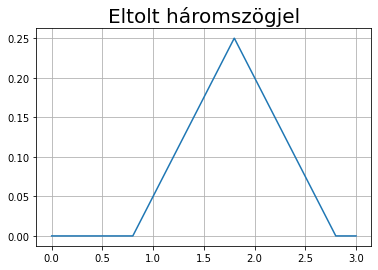

In [47]:
shifted_triangle_impulse = haromszogjel_shift(0.5, 2, 1.5, mintavetelezesrata, 2.1)

ido = np.linspace(0, idotartam, len(shifted_triangle_impulse))


plt.plot(ido, shifted_triangle_impulse)
plt.grid()
plt.title("Eltolt háromszögjel", fontsize=20)

In [48]:
def zaj(size):
    mean = 0
    std_dev = 10*max(shifted_triangle_impulse)
    zajertekek = np.random.normal(mean, std_dev, size)
    
    return zajertekek

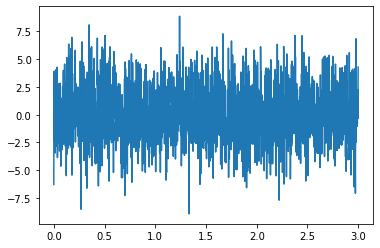

In [49]:
zajjel = zaj(len(ido))

plt.plot(ido, zajjel)

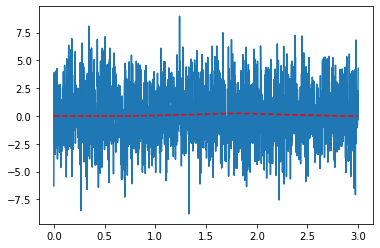

In [50]:
kimenetijel = shifted_triangle_impulse+zajjel

plt.plot(ido, kimenetijel)
plt.plot(ido, shifted_triangle_impulse, "r--")

In [51]:
#A mérés sokszori ismétlése:

ismetlesekszama = 20000

zajertekek = np.zeros((ismetlesekszama, len(ido)))

In [52]:
for i in range(ismetlesekszama):
    
    zajjel = zaj(len(ido))
    
    kimenetijel = shifted_triangle_impulse+zajjel


    
    zajertekek[i] = kimenetijel
    
    



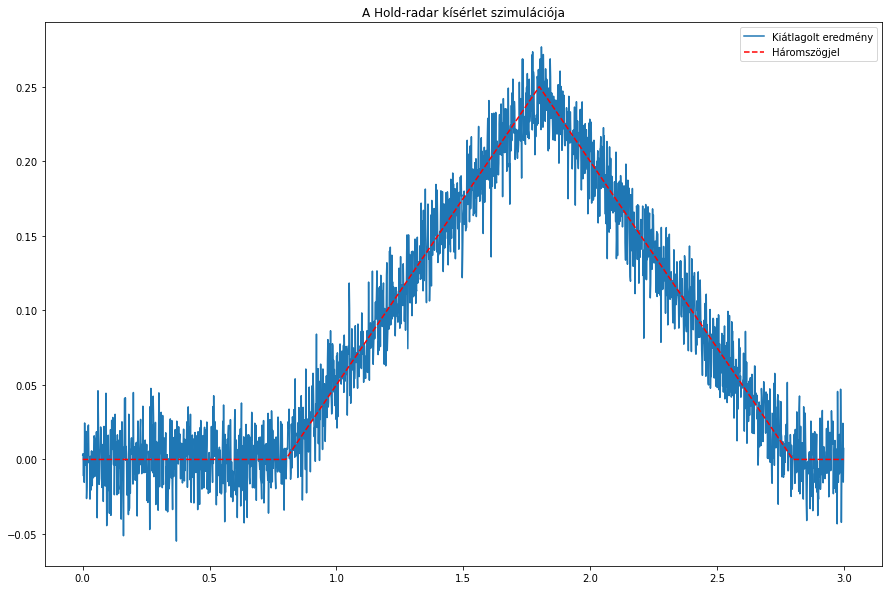

In [53]:
atlagzajertek = np.mean(zajertekek, axis=0)
plt.figure(figsize=(15, 10))

plt.plot(ido, atlagzajertek, label="Kiátlagolt eredmény" )
plt.plot(ido, shifted_triangle_impulse, "r--", label="Háromszögjel")
plt.title("A Hold-radar kísérlet szimulációja")
plt.legend()

In [54]:
# b) korrelációs függvény használata

In [55]:
#Még kell kód

In [56]:
korrelacio = np.correlate(atlagzajertek, shifted_triangle_impulse, mode="full")

korrelacio /= np.max(korrelacio)

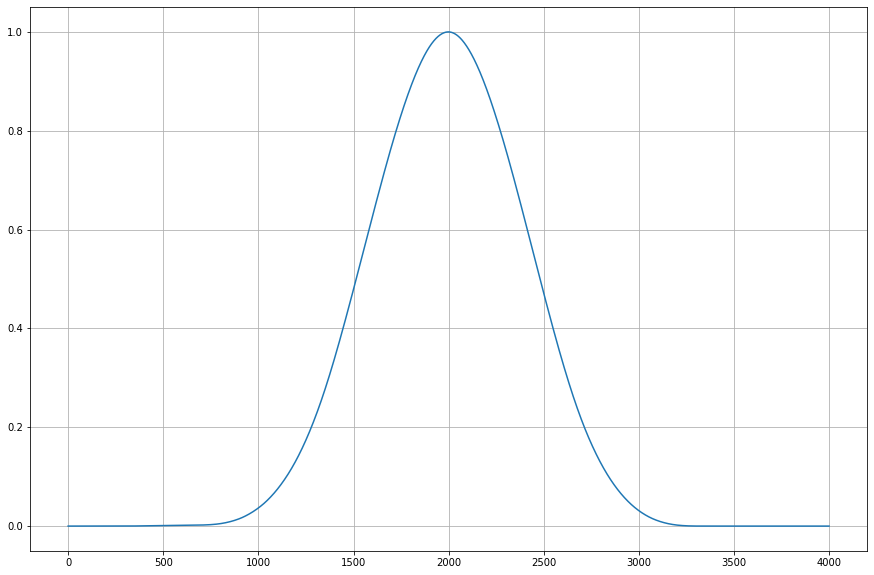

In [57]:
plt.figure(figsize=(15, 10))

plt.plot(korrelacio)
plt.grid()



#Nagyon hasonló jelet kapunk ahhoz, mint amikor a háromszögjel önmagával vatt autokorrelációját vesszük. 

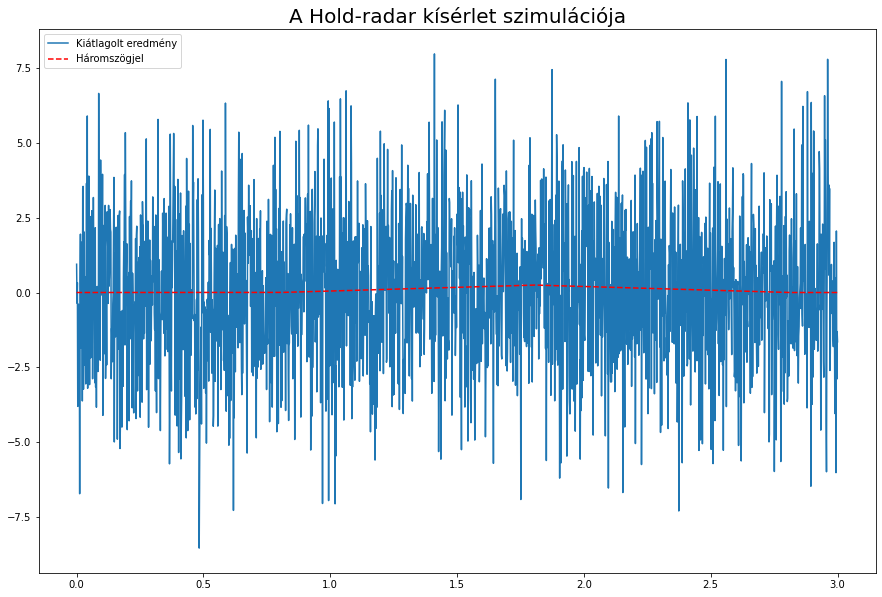

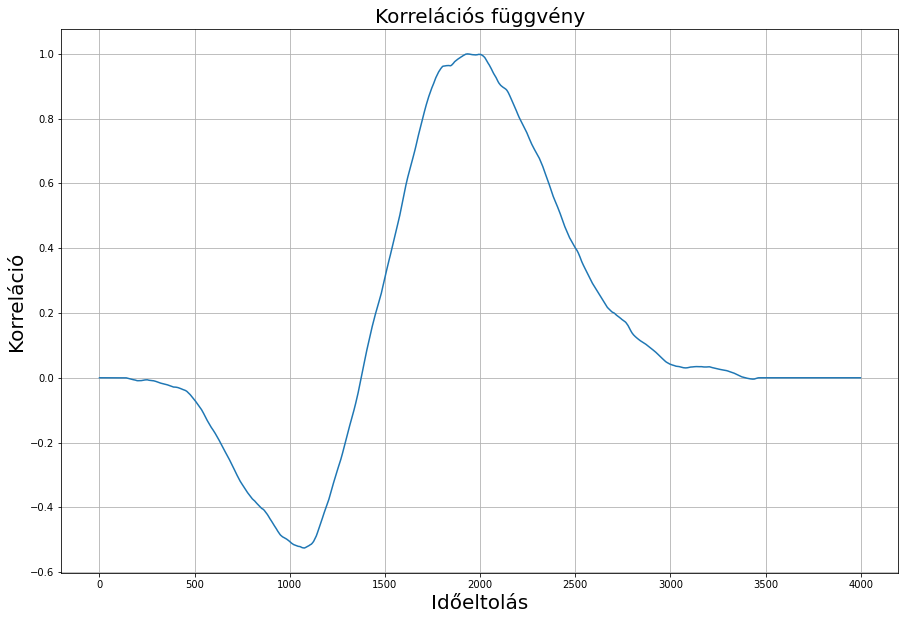

In [58]:
ismetlesekszama = 1

zajertekek = np.zeros((ismetlesekszama, len(ido)))

for i in range(ismetlesekszama):
    zajjel = zaj(len(ido))
    kimenetijel = shifted_triangle_impulse + zajjel
    zajertekek[i] = kimenetijel
    
atlagzajertek = np.mean(zajertekek, axis=0)

plt.figure(figsize=(15, 10))
plt.plot(ido, atlagzajertek, label="Kiátlagolt eredmény")
plt.plot(ido, shifted_triangle_impulse, "r--", label="Háromszögjel")
plt.title("A Hold-radar kísérlet szimulációja", fontsize="20")
plt.legend()

korrelacio = np.correlate(zajertekek[0], shifted_triangle_impulse, mode="full")
korrelacio /= np.max(korrelacio)

plt.figure(figsize=(15, 10))
plt.plot(korrelacio)
plt.grid()
plt.title("Korrelációs függvény", fontsize="20")
plt.xlabel("Időeltolás", fontsize="20")
plt.ylabel("Korreláció", fontsize="20")
plt.show()



In [59]:
#Látható, hogy még az ismétlések elhagyásának esetén is a normált korrelációs függvény abban a pontban,
#ahol a háromszögjel található (1500-3000 közötti időeltolás tartományon)

## Teljes 3. feladatrész - Véletlen bolyongás

Bonyolultabb véletlen folyamatok egyik fajtája a véletlen bolyongás, melyben egy "részecske" valamilyen valószínűségi eloszlás szerint meghatározott lépések megtételével mozog egy, kettő vagy több dimenzióban.
A diszkrét időlépésekben történő bolyongást gyakran a [Brown-mozgás](https://en.wikipedia.org/wiki/Brownian_motion) egyszerű leírására használjuk.
Az egyszerű bolyongás esetén az időfejlődést leíró egyenlet
$$ x(t_{k+1}) = x(t_k) + \xi_k\;,\;\; \mbox{azaz}\;\;\;\; x(t_k) = \sum_{j=0}^{k-1} \xi_j\;, $$
ahol $\xi_k$ a véletlen változó.

Az időben folytonos véletlen folyamatokat ún. sztochasztikus differenciálegyenletekkel írjuk le.
Például a véletlen bolyongás határesete a Wiener-folyamat, melynek egyenlete
$$
\dot x = \xi(t)\;,
$$
ahol $\xi(t)$ a véletlenszerű fehér zajt reprezentálja.

#### Feladatok

a)
Írjunk egy `randomwalk` függvényt, amely megadott $N$-re szimulál egy $N$ lépéses egydimenziós véletlen bolyongást normál eloszlású véletlen lépésekkel! Ábrázoljuk a folyamat egy szakaszát úgy, hogy a bolyongás tipikus viselkedése jól megfigyelhető legyen.

b)
Mutassuk meg, hogy a bolyongás során a kiindulási ponttól való eltávolodásnak a várható értéke arányos a lépésszám négyzetgyökével!

In [60]:
# a) randomwalk függvény, véletlen bolyongás

import random 



In [61]:
def random_walk(N):
    
    hely = [0, ]
    
    for k in range(N):
        step = np.random.randn()
        
        position = hely[-1]+step
        
        hely.append(position)
        
    return hely

In [62]:
N = 1000

pozicio = random_walk(N)

In [63]:
lepesszam = np.linspace(0, N-1, N+1)

Text(0, 0.5, 'Pozíció')

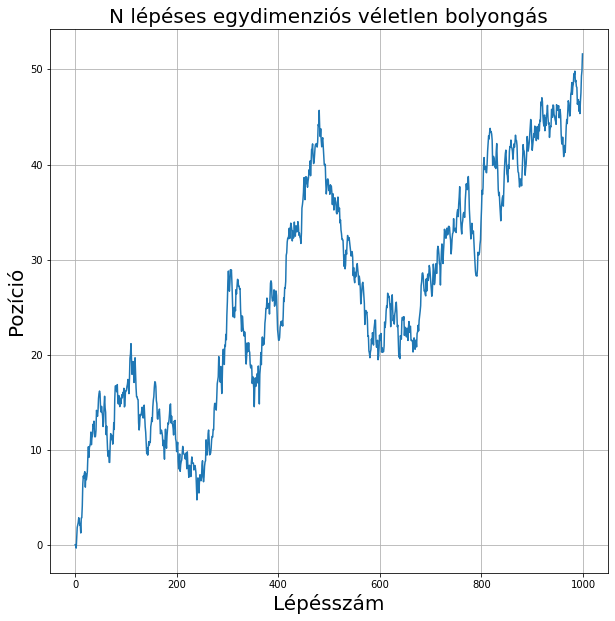

In [64]:
plt.figure(figsize=(10, 10))
plt.plot(lepesszam, pozicio)
plt.grid()
plt.title("N lépéses egydimenziós véletlen bolyongás", fontsize="20")
plt.xlabel("Lépésszám", fontsize="20")
plt.ylabel("Pozíció", fontsize="20")

In [65]:
# b) sqrt(t) függés ellenőrzése

In [66]:

elteres = abs(np.array(pozicio)-pozicio[0])
    

In [67]:
atlagpozicio = np.zeros(N+1)
for i in range(1000):
    atlagpozicio += abs(np.array(random_walk(N)))



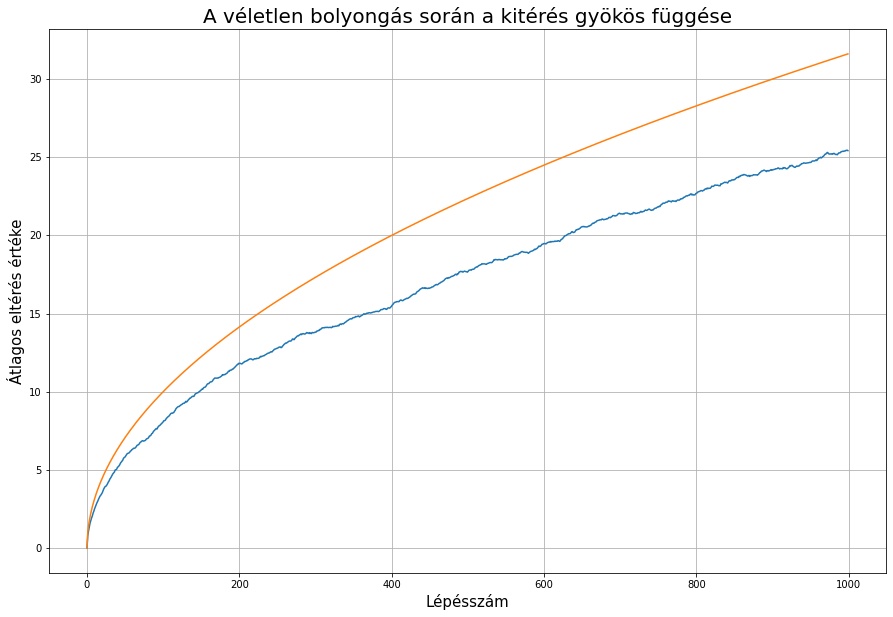

In [68]:
plt.figure(figsize=(15, 10))

plt.plot(lepesszam, atlagpozicio/1000)
plt.plot(lepesszam, np.sqrt(lepesszam))


plt.xlabel('Lépésszám', fontsize='15')
plt.ylabel('Átlagos eltérés értéke', fontsize='15')
plt.title('A véletlen bolyongás során a kitérés gyökös függése', fontsize='20')
plt.grid(True)
plt.show()

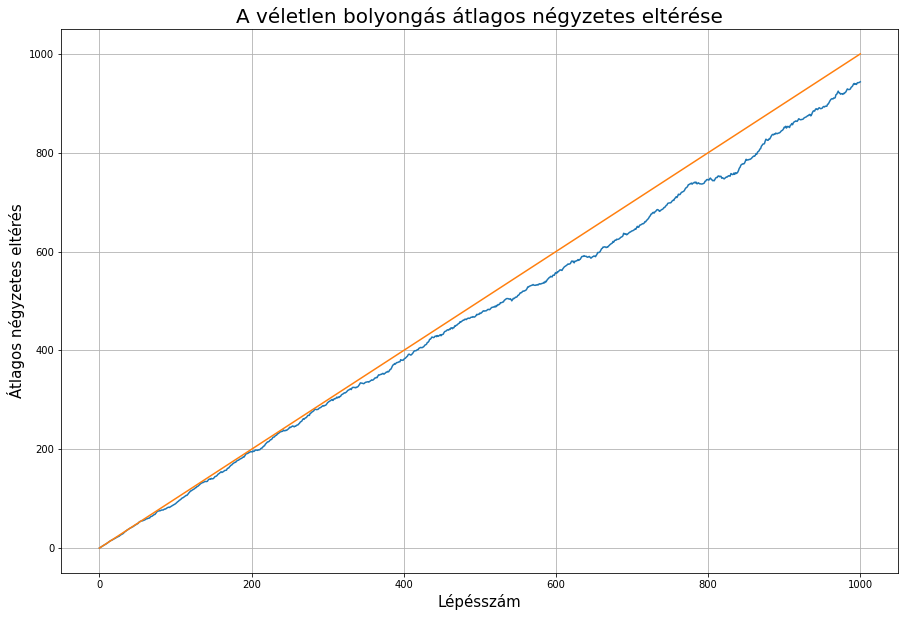

In [69]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000   # Number of steps
num_simulations = 1000

lepesszam = np.arange(N+1)   # Step numbers
atlagpozicio = np.zeros(N+1) # Average position

for _ in range(num_simulations):
    pozicio = random_walk(N)
    elteres = np.array(pozicio) - pozicio[0]
    atlagpozicio += elteres**2
    
plt.figure(figsize=(15, 10))

plt.plot(lepesszam, atlagpozicio/num_simulations)
plt.plot(lepesszam, lepesszam)  # Plotting a straight line
plt.xlabel('Lépésszám', fontsize='15')
plt.ylabel('Átlagos négyzetes eltérés', fontsize='15')
plt.title('A véletlen bolyongás átlagos négyzetes eltérése', fontsize='20')
plt.grid(True)
plt.show()


## Teljes 4. feladatrész - Stacionárius véletlen folyamatok


A véletlen folyamatok közül fontosak a stacionáriusak, amelyeknél a felvett $x$ értékek hosszú időre meghatározott eloszlásfüggvénye invariáns az időeltolásra. Ez a tulajdonság az egyszerű bolyongásra és a Wiener-folyamatra nem teljesül, mivel a koordináta értékek eloszlása egyre szélesedik.
A Brown mozgást végző részecske sebességének valószínűségeloszlása azonban stacionárius, ha a sebesség minden határon túli növekedésének a közeg viszkozitása gátat szab.
Ezt folytonos időre írja le az ún. [Ornstein-Uhlenbeck-folyamat](https://en.wikipedia.org/wiki/Ornstein–Uhlenbeck_process), aminek differenciálegyenlete
$$ \dot v = - \gamma v + D\cdot\xi(t)\;,$$
ahol $\gamma$ és $D$ pozitív konstansok, melyek a csillapítás erősségét, illetve a folyamat diffúzivitását adják meg, $\xi(t)$ továbbra is fehér zaj.
Talán könyebben megérthető ennek időben diszkretizált változata:
$$ v(t_{k+1}) = (1-\alpha)\cdot v(t_k) + D\cdot\xi_k\;,\;\;\alpha=\gamma \Delta t\;,$$
amiben az első tag szemléletesen a sebesség csillapodását írja le  $\alpha\ll 1$ esetére. A második pedig az időlépés alatt a közeg részecskéivel történt ütközések eredő hatását adja meg (valójában az utóbbi függ a részecske sebességétől, de ez a hatás átlagolva az első tagba van beleértve). Vegyük észre, hogy a fenti képlet alapján sebesség időfejlődése két paramétertől függ: az $\alpha$-tól és $D$-től.
Érdemes megjegyezni, hogy a sebesség időfejlődése hasonlít a véletlen bolyongáshoz, és azzá is válik a $\gamma=0$ határesetben.

#### Feladatok

a) Írjunk egy  `brownian` függvényt, amely  az egydimenziós csillapított Brown-mozgás sebességét szimulálja és segítségével ábrázoljuk  azt az  idő függvényében!

b) Határozzuk meg a Brown-mozgás sebességének autokorrelációs függvényét $\alpha=0.01$ és $D=1$ értékekre és ábrázoljuk! Mivel ez egy  véletlen folyamat,  az autokorreláció értékei erősen véletlenszerűek. Végezzük el a szimulációt és számolást elegendően sokszor, és ellenőrizzük, hogy ha az eredményeket összeátlagoljuk egymással, az átlag valóban simább, mint az átlagolás nélküli korrelációs függvény! 

c) Hogyan függ a korrelációk lecsengése a mozgás paramétereitől? Vizsgáljuk meg egy, a fentebb használt $\alpha$ értéknél kisebb,  és egy nála nagyobb $\alpha$-ra ezt a kérdést! Ezután egy adott $\alpha$ érték mellett vegyünk még két  különböző $D$ értéket!  Foglaljuk össze röviden szavakban, hogy mit tapasztalunk!

d) Határozzuk meg  a Brown-mozgás sebességének teljesítményspektrumát! A b) részhez hasonlóan itt is mutassuk ki, 
hogy a többszöri lefuttatás során kapott teljesítményspektrumok átlaga simább, mint egy lefutásé!

e) Mutassuk meg  a csillapított Brown-mozgás esetére, hogy igaz a Wiener-Hincsin-tétel, azaz, hogy az autokorrelációs függvény Fourier-transzformáltjának abszolút értéke megegyezik a teljesítményspektrummal! Itt is próbáljuk ki az átlagolást!

In [70]:
# a)  Brown-mozgás 

def csillapitott_brown_mozgas(T, dt, V0, D, gamma):
    
    
    #A bementei paraméterek:
    
    #T teljes idő
    #dt az időléptetés mértéke
    #V0 a kezdeti sebesség
    #D a diffuzivitást kifejező konstans
    #gamma a csillapítást kifejező paraméter
    
    num_steps = int(T/dt)
    t = np.linspace(0, T, num_steps+1)
    
    dW = np.random.normal(0.0, np.sqrt(dt), num_steps)  #véletlenszerű értékek, amelyeknek az átlaga nulla, a szórását pedig a 
    #lépsszám gyöke adja meg
    
    v = np.zeros(num_steps + 1)        #Sebességeket ebben a listában tárolom majd
    v[0] = v0
    
    alpha = gamma * dt

    for i in range(num_steps):
        v[i + 1] = (1 - alpha) * v[i] + D * dW[i]

    return v, t



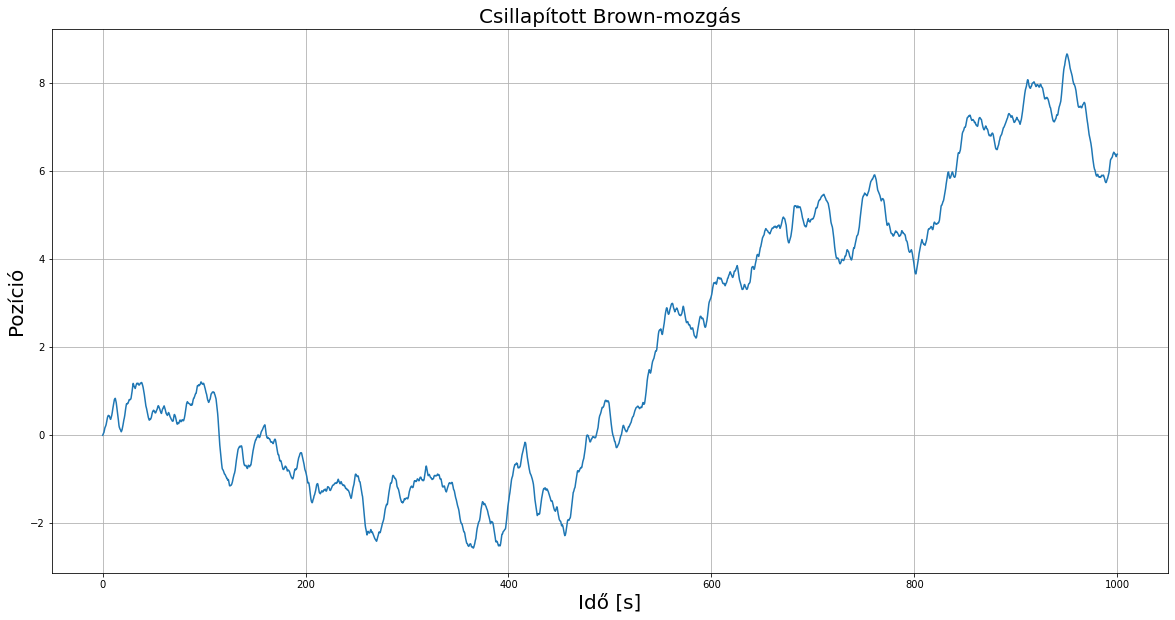

In [71]:
T = 1000.0     # Teljes idő
dt = 0.01   # időlépték
v0 = 0.0    # kezdeti sebesség
D = 0.1     # diffúziós együttható
gamma = 0.5 # csillapítási együttható

velocities, time = csillapitott_brown_mozgas(T, dt, v0, D, gamma)

# Ábrázolás
plt.figure(figsize=(20, 10))
positions = np.cumsum(velocities) * dt
plt.plot(time, positions)
plt.xlabel('Idő [s]', fontsize="20")
plt.ylabel('Pozíció', fontsize="20")
plt.title('Csillapított Brown-mozgás', fontsize="20")
plt.grid(True)
plt.show()









In [72]:
# b) a Brown-mozgás sebességének autokorrelációs függvénye és átlaga

In [73]:
T = 1000.0     # Teljes idő
dt = 0.01   # időlépték
v0 = 0.0    # kezdeti sebesség
D = 1     # diffúziós együttható
gamma = 1 # csillapítási együttható

#Az alfa tényezőt a gamma*dt szorzat adja, a két szám szorzata adja meg, ez jelen esetben 1*0.01 = 0.01

velocities, time = csillapitott_brown_mozgas(T, dt, v0, D, gamma)


In [74]:
correlated_single_brownian = np.correlate(velocities, velocities, mode="full")

correlated_single_brownian /= np.max(correlated_single_brownian)          #A kódsor segítségével normálom  a korreláció mértékét

In [75]:
len(correlated_single_brownian)

200001

In [76]:
xtengely1 = np.arange(-len(velocities) + 1, len(velocities))


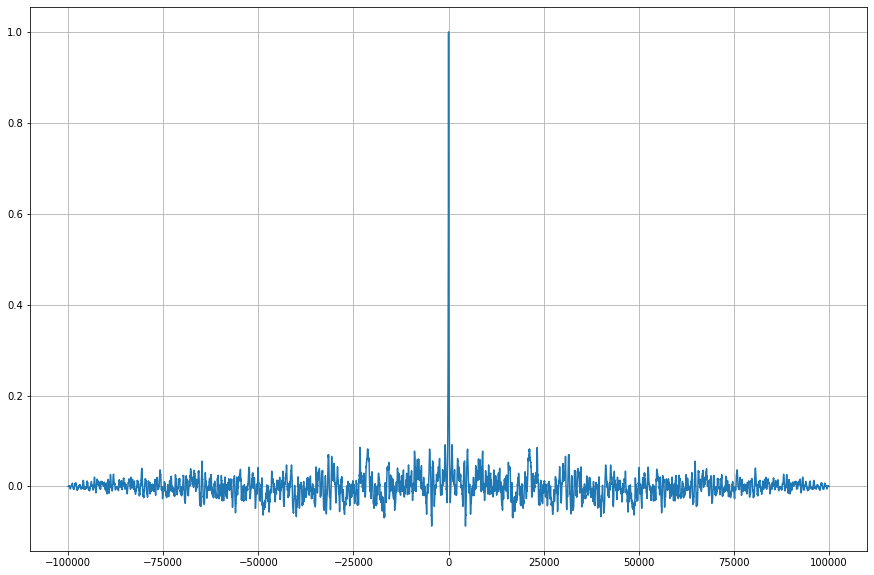

In [77]:
plt.figure(figsize=(15,10))

plt.plot(xtengely1, correlated_single_brownian)
plt.grid()

In [78]:
#több szimuláció elvégzése és átlagolása:


num_simulations = 10
autocorrelation_functions_list = []


for _ in range(num_simulations):
    velocities, time = csillapitott_brown_mozgas(T, dt, v0, D, gamma)
    
    # Calculate autocorrelation function
    autocorrelationfunction = np.correlate(velocities, velocities, mode='full')
    
    # Normalize the autocorrelation function
    autocorrelationfunction /= np.max(autocorrelationfunction)
    
    autocorrelation_functions_list.append(autocorrelationfunction)


In [79]:
autocorrelation_functions_list[0]

array([0.00000000e+00, 1.73258023e-07, 2.12990391e-06, ...,
       2.12990391e-06, 1.73258023e-07, 0.00000000e+00])

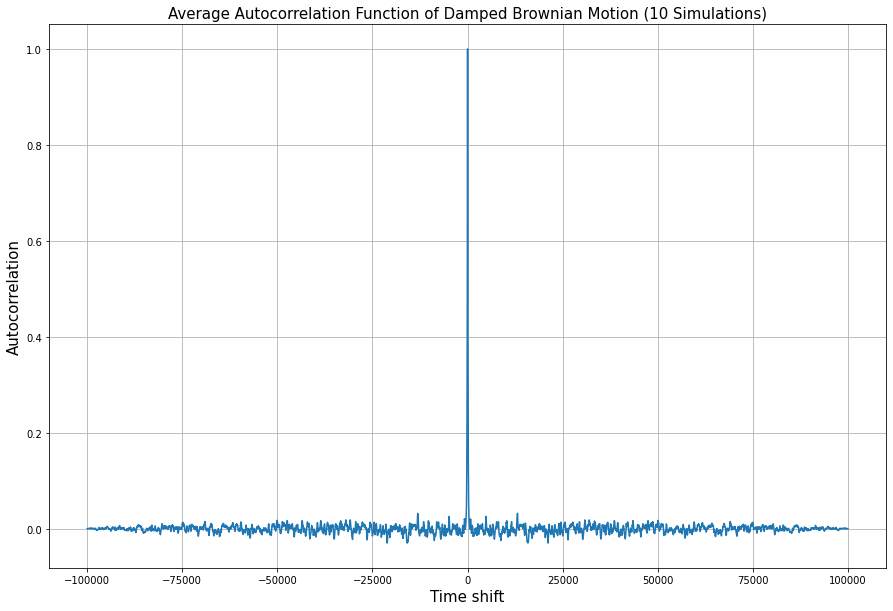

In [80]:
average_autocorrelation_function = np.mean(autocorrelation_functions_list, axis=0)

# Generate the lag vector
xtengely2 = np.arange(-len(velocities) + 1, len(velocities))

# Plotting the average autocorrelation function
plt.figure(figsize=(15,10))
plt.plot(xtengely2, average_autocorrelation_function)
plt.xlabel('Time shift', fontsize="15")
plt.ylabel('Autocorrelation', fontsize="15")
plt.title('Average Autocorrelation Function of Damped Brownian Motion (10 Simulations)', fontsize="15")
plt.grid(True)
plt.show()

In [81]:
#A két autokorrelációs függvényt egymás mellett ábrázolva látható, hogy az átlagolás esetén egy sokkal "simább" 
#(a 0-tól eltekintve sokkal kisebb amplitúdójú)

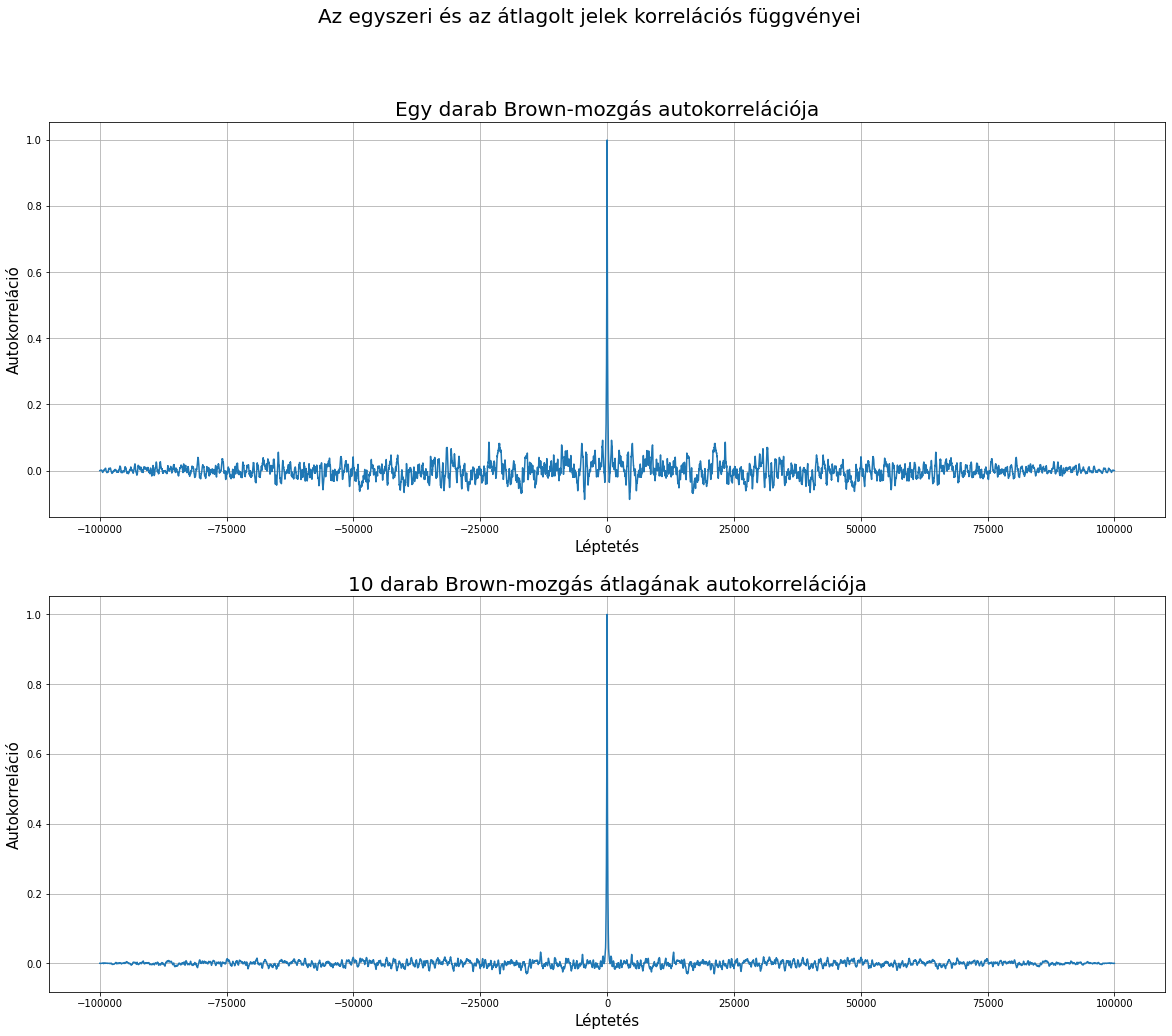

In [82]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, figsize=(20, 16))
fig.suptitle('Az egyszeri és az átlagolt jelek korrelációs függvényei', fontsize="20")

axs[0].plot(xtengely1, correlated_single_brownian)
axs[0].set_title('Egy darab Brown-mozgás autokorrelációja', fontsize="20")
axs[0].set_xlabel('Léptetés', fontsize="15")
axs[0].set_ylabel('Autokorreláció', fontsize="15")
axs[0].grid(True)

axs[1].plot(xtengely2, average_autocorrelation_function)
axs[1].set_title('10 darab Brown-mozgás átlagának autokorrelációja', fontsize="20")
axs[1].set_xlabel('Léptetés', fontsize="15")
axs[1].set_ylabel('Autokorreláció', fontsize="15")
axs[1].grid(True)

plt.show()


In [83]:
# c) paraméterektől való függés

In [84]:
def borwnian2(lepesszam, D, alfa):
    v = [0]
    
    for lepes in range(1, lepesszam):
        zaj = np.random.normal(0, 1, 1)
        v.append((1-alfa)*v[lepes-1]+D*zaj)
        
        
    return v

In [85]:
#Kis alfa és kis D értékekere a szimuláció

alfa = 0.005
D = 0.1 
lepesszam = 5000

pozicio1 = borwnian2(lepesszam, D, alfa)

In [86]:
xtengely1 = np.arange(-len(pozicio1) + 1, len(pozicio1))


In [87]:
smallalfa1 = np.correlate(pozicio1, pozicio1, mode="full")

/opt/conda/lib/python3.8/site-packages/numpy/core/numeric.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return multiarray.correlate2(a, v, mode)


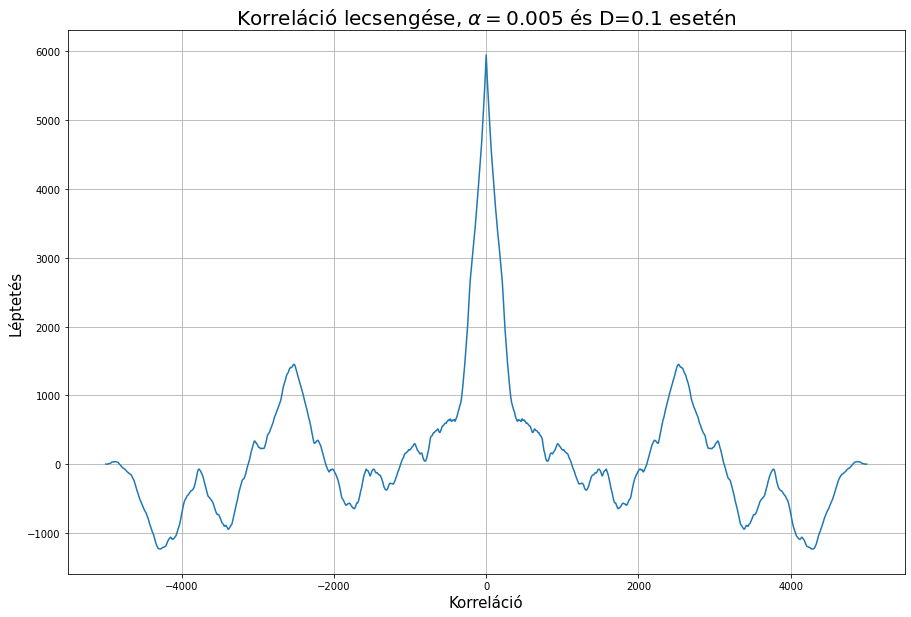

In [88]:
plt.figure(figsize=(15, 10))

plt.plot(xtengely1, smallalfa1)
plt.title(r'Korreláció lecsengése, $\alpha = 0.005$ és D=0.1 esetén', fontsize="20")
plt.xlabel("Korreláció", fontsize="15")
plt.ylabel("Léptetés", fontsize="15")
plt.grid()

In [89]:
#Kis alfa és nagy D értékekre a következőket kapjuk

alfa = 0.005
D = 10 
lepesszam = 5000

pozicio2 = borwnian2(lepesszam, D, alfa)

In [90]:
xtengely2 = np.arange(-len(pozicio2) + 1, len(pozicio2))

In [91]:
smallalfa2 = np.correlate(pozicio2, pozicio2, mode="full")

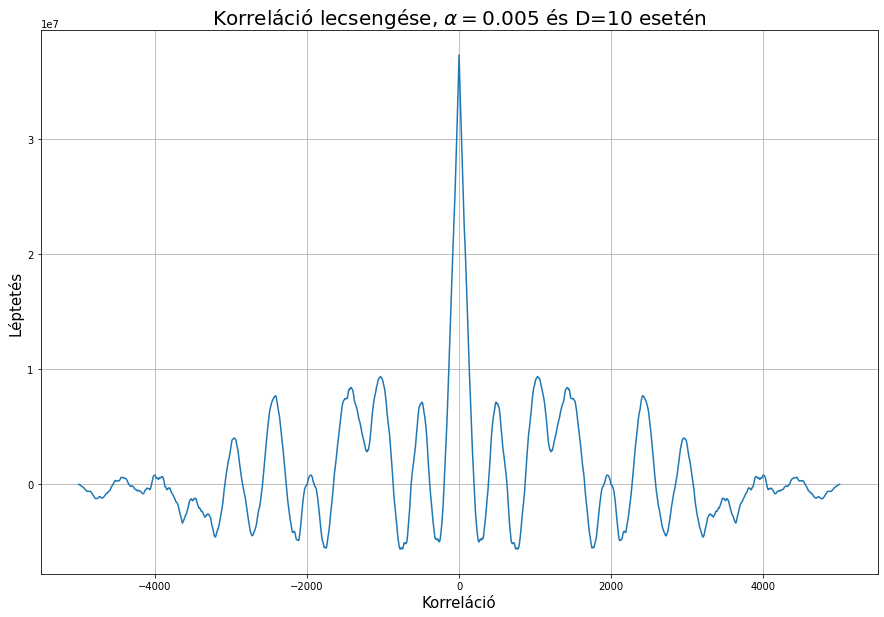

In [92]:
plt.figure(figsize=(15, 10))

plt.plot(xtengely2, smallalfa2)
plt.title(r'Korreláció lecsengése, $\alpha = 0.005$ és D=10 esetén', fontsize="20")
plt.xlabel("Korreláció", fontsize="15")
plt.ylabel("Léptetés", fontsize="15")

plt.grid()

In [93]:
#Nagy alfa és kis D értékre a következőket kapjuk:


alfa = 0.2
D = 0.1 
lepesszam = 5000

pozicio3 = borwnian2(lepesszam, D, alfa)

In [94]:
xtengely3 = np.arange(-len(pozicio3) + 1, len(pozicio3))

In [95]:
bigalfa1 = np.correlate(pozicio3, pozicio3, mode="full")

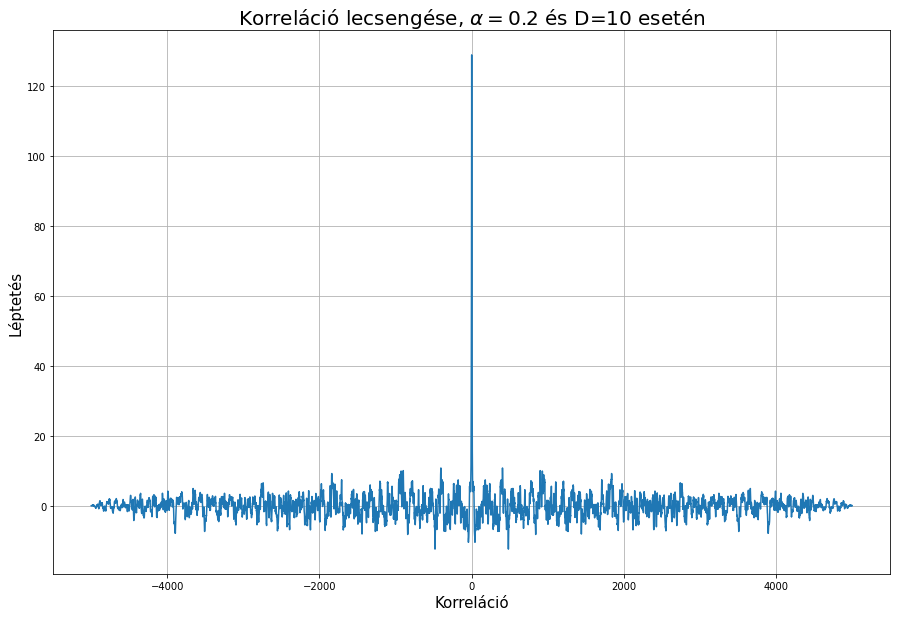

In [96]:
plt.figure(figsize=(15, 10))

plt.title(r'Korreláció lecsengése, $\alpha = 0.2$ és D=10 esetén', fontsize="20")
plt.xlabel("Korreláció", fontsize="15")
plt.ylabel("Léptetés", fontsize="15")


plt.plot(xtengely3, bigalfa1)
plt.grid()

In [97]:
#nagy alfa és nagy D értékekre a következőket kapjuk:

alfa = 0.2
D = 10
lepesszam = 5000

pozicio4 = borwnian2(lepesszam, D, alfa)

In [98]:
xtengely4 = np.arange(-len(pozicio4) + 1, len(pozicio4))

In [99]:
bigalfa2 = np.correlate(pozicio4, pozicio4, mode="full")

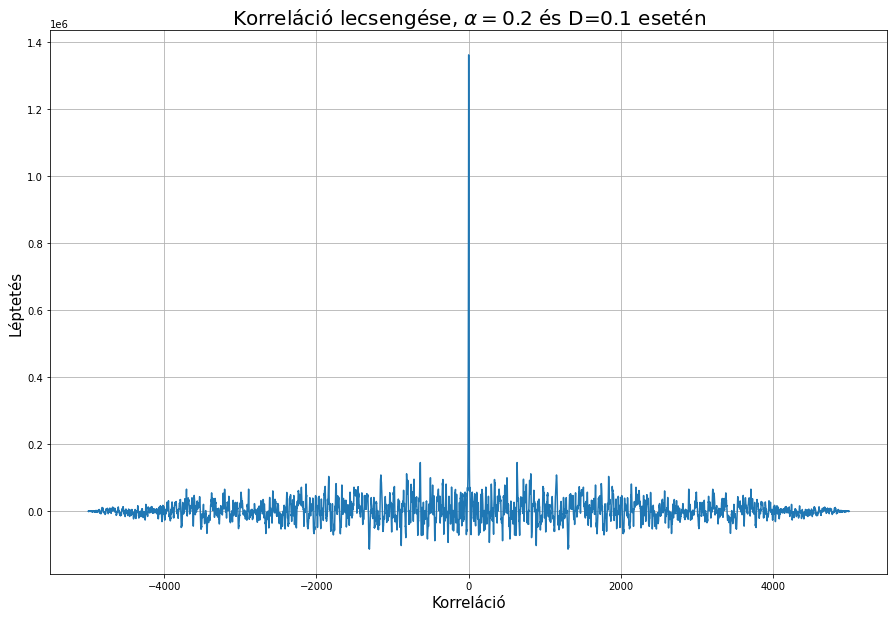

In [100]:
plt.figure(figsize=(15, 10))
plt.plot(xtengely4, bigalfa2)
plt.title(r'Korreláció lecsengése, $\alpha = 0.2$ és D=0.1 esetén', fontsize="20")

plt.xlabel("Korreláció", fontsize="15")
plt.ylabel("Léptetés", fontsize="15")
plt.grid()

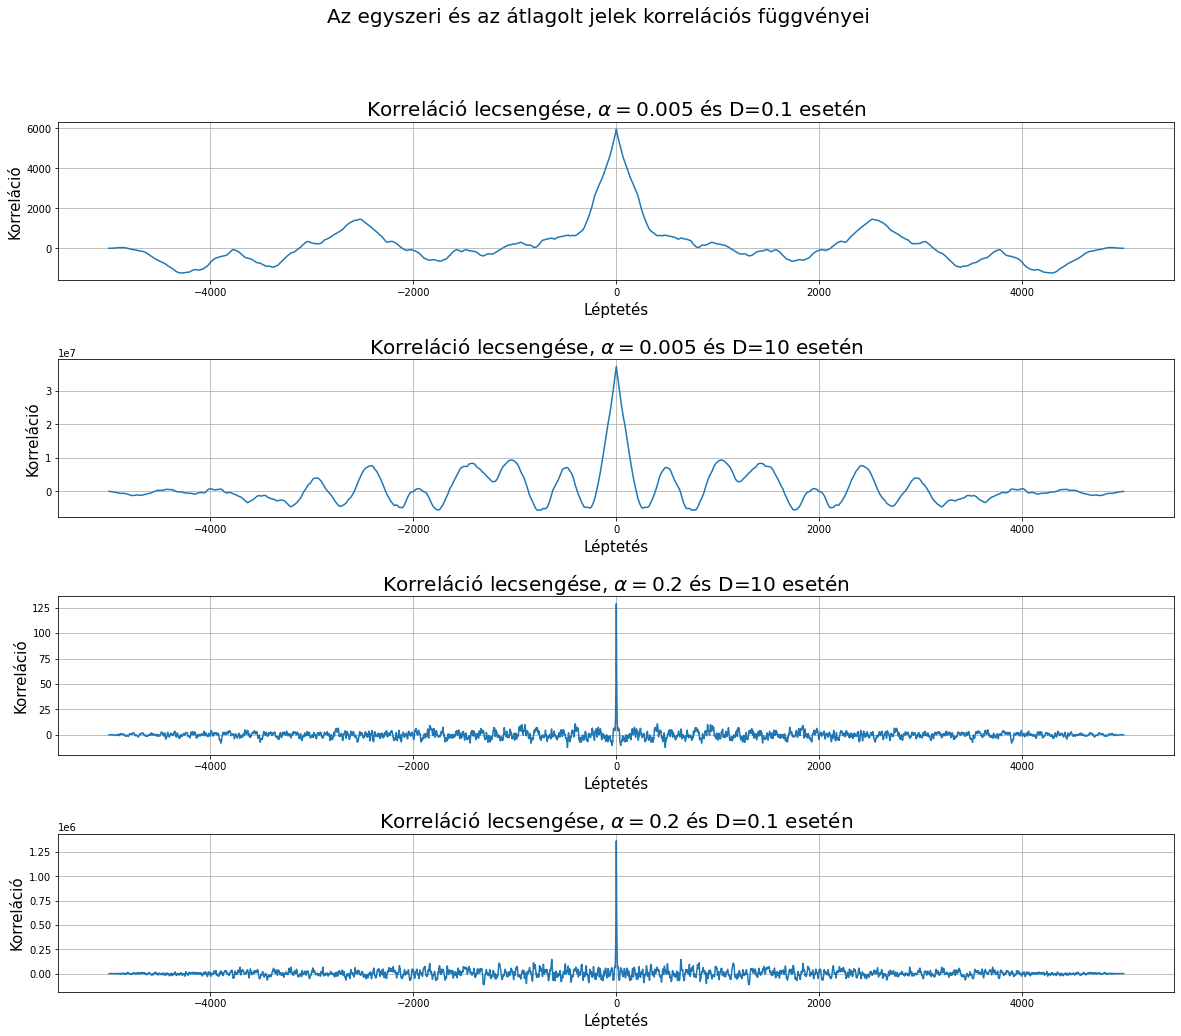

In [101]:
#A négy grafikont egybe ábrázolva a következőket kapjuk:

import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, figsize=(20, 16))
fig.suptitle('Az egyszeri és az átlagolt jelek korrelációs függvényei', fontsize="20")

axs[0].plot(xtengely1, smallalfa1)
axs[0].set_title(r'Korreláció lecsengése, $\alpha = 0.005$ és D=0.1 esetén', fontsize="20")
axs[0].set_xlabel('Léptetés', fontsize="15")
axs[0].set_ylabel('Korreláció', fontsize="15")
axs[0].grid(True)

axs[1].plot(xtengely2, smallalfa2)
axs[1].set_title(r'Korreláció lecsengése, $\alpha = 0.005$ és D=10 esetén', fontsize="20")
axs[1].set_xlabel('Léptetés', fontsize="15")
axs[1].set_ylabel('Korreláció', fontsize="15")
axs[1].grid(True)

axs[2].plot(xtengely3, bigalfa1)
axs[2].set_title(r'Korreláció lecsengése, $\alpha = 0.2$ és D=10 esetén', fontsize="20")
axs[2].set_xlabel('Léptetés', fontsize="15")
axs[2].set_ylabel('Korreláció', fontsize="15")
axs[2].grid(True)

axs[3].plot(xtengely4, bigalfa2)
axs[3].set_title(r'Korreláció lecsengése, $\alpha = 0.2$ és D=0.1 esetén', fontsize="20")
axs[3].set_xlabel('Léptetés', fontsize="15")
axs[3].set_ylabel('Korreláció', fontsize="15")
axs[3].grid(True)

fig.subplots_adjust(hspace=0.5)  # Increase the vertical spacing

plt.show()


A rendszerben alfa a csillapítás, tompítás mértékét adja meg. A nagyobb alfa értékek erősebb csillapítást jelentenek, ami az idő függvényében gyorsabb sebességcsökkenést eredményez. A nagyobb alfa paraméterű függvény konvolváltja emiatt gyorsabban cseng le. 

Az alacsonyabb alfa értékek lassab lecsengést eredményeznek.

A D diffúziós együttható meghatározza a Brown-mozgás véletlenszerű mozgásának a sebességét. A nagyobb D érték nagyobb elmozdulást okoz a Brown-mozgásban. A nagyobb D érték a konvolvált függvény szélesebb eloszlását és gyorsabb lecsengését okozza.

D értékének csökkentése lassabb diffúziót eredményez, amely szűkebb eloszlást és lassabb lecsengést eredményez a korrelációs függvényben.

In [102]:
# d) teljesítményspektrum és átlag 

In [103]:
#A kezdeti paraméterek

T = 10.0     # Total time
dt = 0.01    # Time step
v0 = 0.0     # Initial velocity
D = 1.0      # Diffusion coefficient
gamma = 0.1  # Damping coefficient

In [104]:
velocities, t = csillapitott_brown_mozgas(T, dt, v0, D, gamma)

fft_result = np.fft.fft(velocities)
power_spectrum = np.abs(fft_result) ** 2
frequencies = np.fft.fftfreq(len(t), dt)
positive_frequencies1mert = frequencies[:len(frequencies)//2]
power_spectrum_positive1mert = power_spectrum[:len(power_spectrum)//2]

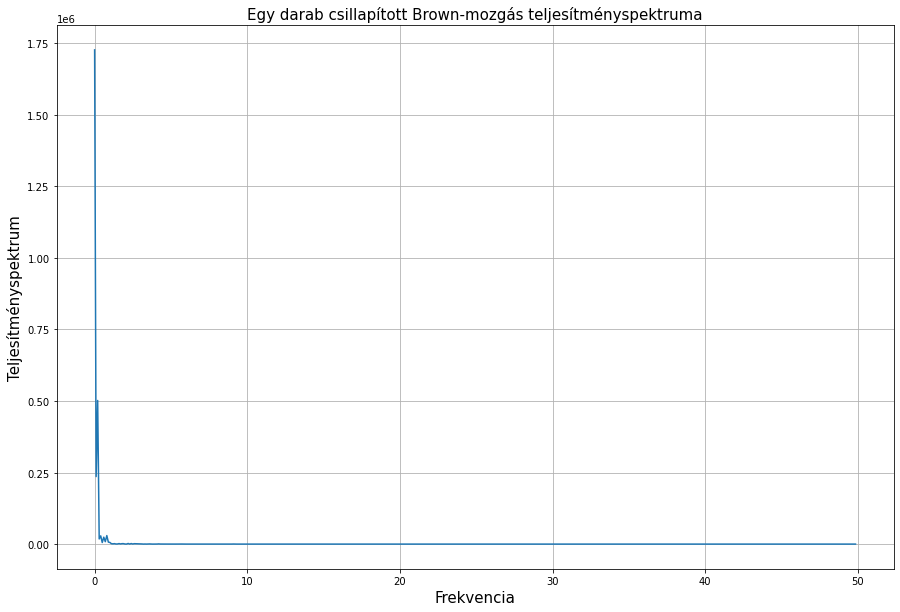

In [105]:
plt.figure(figsize=(15, 10))

plt.plot(positive_frequencies1mert, power_spectrum_positive1mert)
plt.xlabel('Frekvencia', fontsize="15")
plt.ylabel('Teljesítményspektrum', fontsize="15")
plt.title('Egy darab csillapított Brown-mozgás teljesítményspektruma', fontsize="15")
plt.grid()
plt.show()









In [106]:
#Az átlagolt teljesítményspektrum meghatározása:


num_simulations = 100

velocitieslist = []




for _ in range(num_simulations):
    velocities, time = csillapitott_brown_mozgas(T, dt, v0, D, gamma)
    
    velocitieslist.append(velocities)
    
    
    


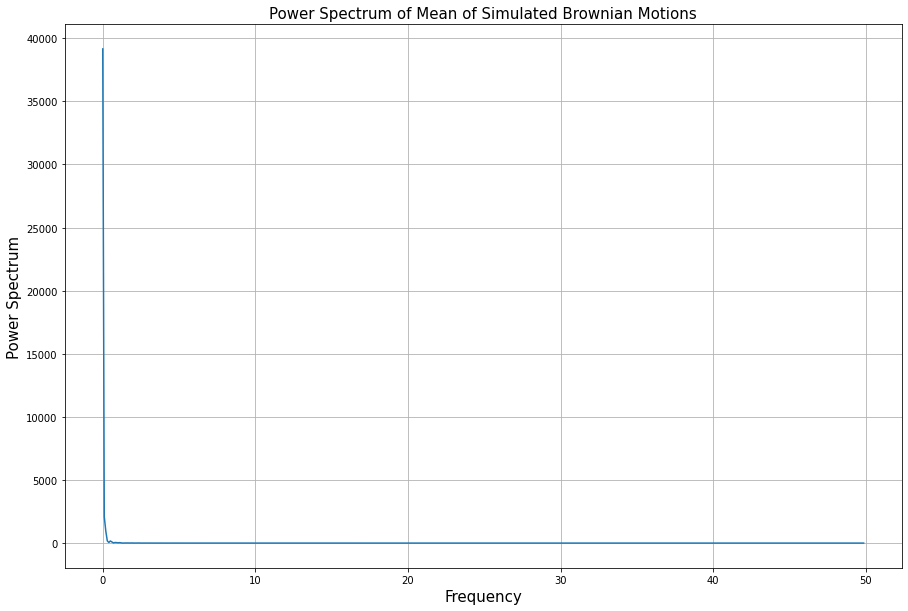

In [107]:
# Calculate the mean of the simulated velocities
meanvelocities = np.mean(velocitieslist, axis=0)

# Perform FFT on the mean velocities
fft_result = np.fft.fft(meanvelocities)
power_spectrum = np.abs(fft_result) ** 2
frequencies = np.fft.fftfreq(len(time), dt)
positive_frequencies2mert = frequencies[:len(frequencies)//2]
power_spectrum_positive2mert = power_spectrum[:len(power_spectrum)//2]

# Plot power spectrum of the mean velocities
plt.figure(figsize=(15, 10))

plt.plot(positive_frequencies2mert, power_spectrum_positive2mert)
plt.xlabel('Frequency', fontsize="15")
plt.ylabel('Power Spectrum', fontsize="15")
plt.title('Power Spectrum of Mean of Simulated Brownian Motions', fontsize="15")
plt.grid()
plt.show()

In [108]:
# e)  Wiener-Hincsin-tétel ellenőrzése

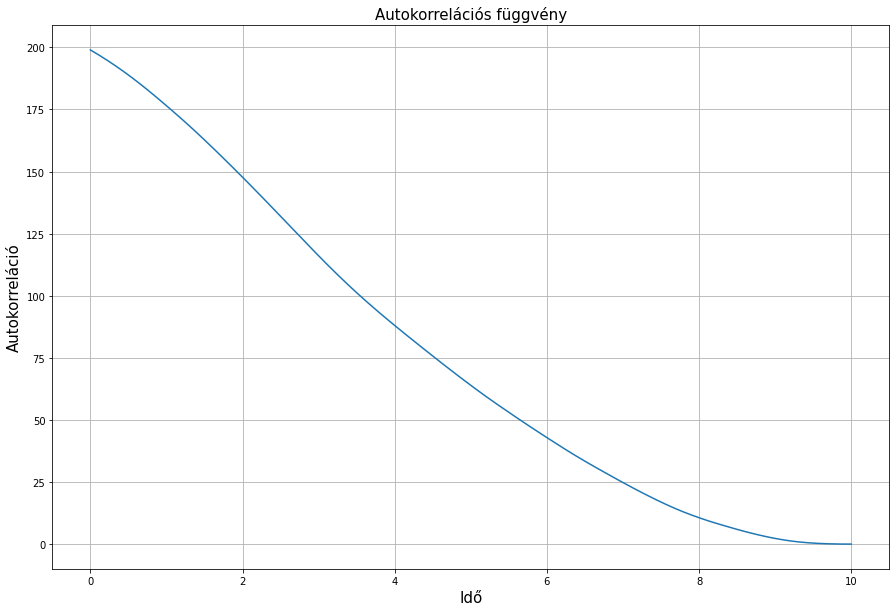

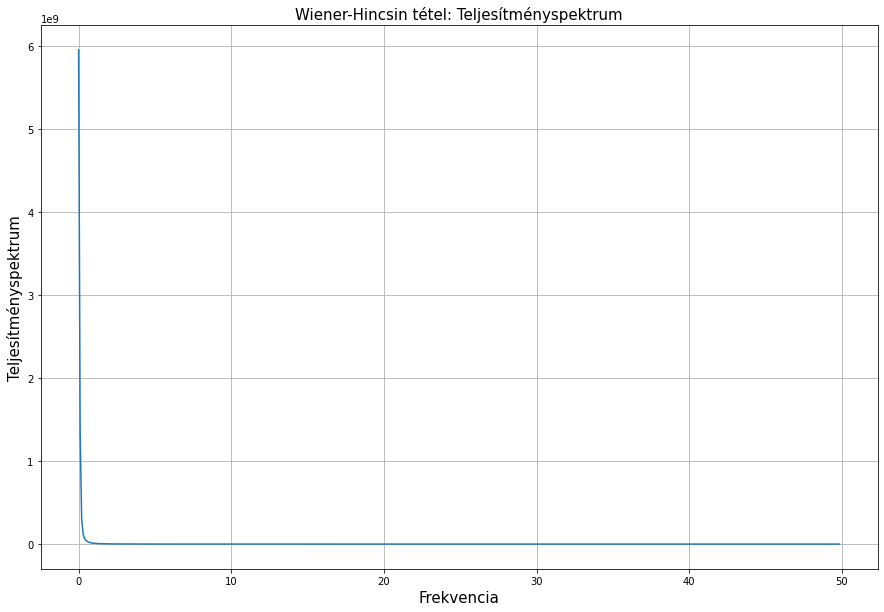

In [119]:



# Paraméterek
T = 10.0     # Teljes idő
dt = 0.01    # Időlépték
v0 = 0.0     # Kezdeti sebesség
D = 1.0      # Diffúziós együttható
gamma = 0.1  # Csillapítási együttható
num_simulations = 100  # Szimulációk száma

# Szimulációk végrehajtása és pozíció jel átlagolása
positions_list = []
for _ in range(num_simulations):
    velocities, time = csillapitott_brown_mozgas(T, dt, v0, D, gamma)
    positions_list.append(np.cumsum(velocities) * dt)
mean_position = np.mean(positions_list, axis=0)

# Autokorrelációs függvény meghatározása
autocorrelation = np.correlate(mean_position, mean_position, mode='full')
autocorrelation = autocorrelation[len(autocorrelation)//2:]  # Csak a releváns rész

# Fourier-transzformált meghatározása
power_spectrum = np.abs(np.fft.fft(autocorrelation)) ** 2
frequencies = np.fft.fftfreq(len(autocorrelation), dt)
positive_frequencies2szim = frequencies[:len(frequencies)//2]
power_spectrum_positive2szim = power_spectrum[:len(power_spectrum)//2]

# Autokorrelációs függvény ábrázolása
plt.figure(figsize=(15, 10))
plt.grid()

time_autocorr = np.arange(0, len(autocorrelation)) * dt
plt.plot(time_autocorr, autocorrelation)
plt.xlabel('Idő', fontsize="15")
plt.ylabel('Autokorreláció', fontsize="15")
plt.title('Autokorrelációs függvény', fontsize="15")
plt.show()

# Teljesítményspektrum ábrázolása
plt.figure(figsize=(15, 10))
plt.grid()


plt.plot(positive_frequencies2szim, power_spectrum_positive2szim)
plt.xlabel('Frekvencia', fontsize="15")
plt.ylabel('Teljesítményspektrum', fontsize="15")
plt.title('Wiener-Hincsin tétel: Teljesítményspektrum', fontsize="15")
plt.grid(True)
plt.show()



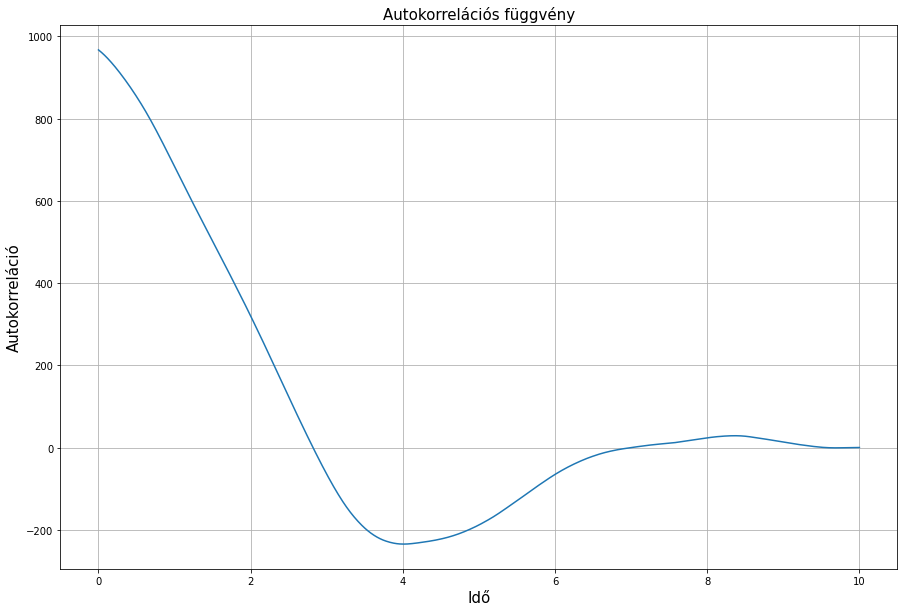

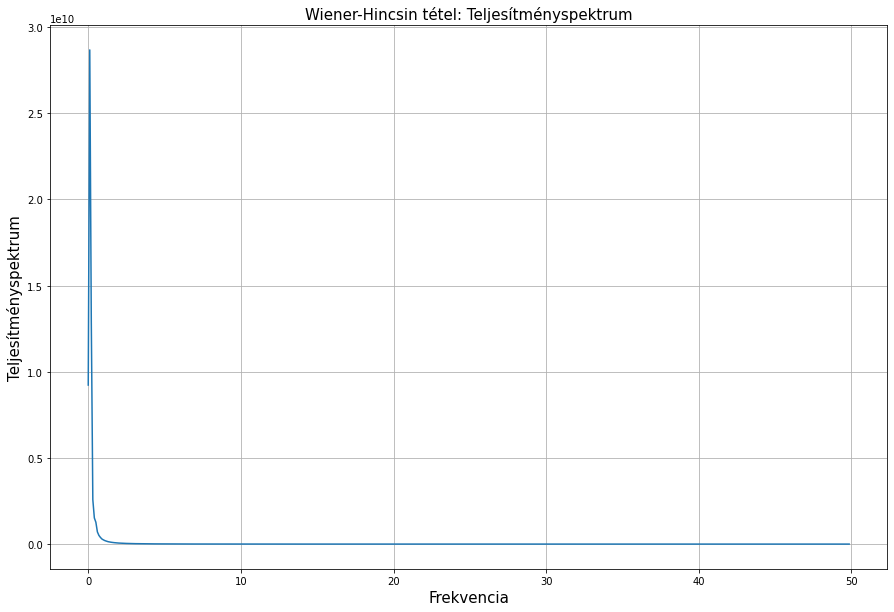

In [120]:
import numpy as np
import matplotlib.pyplot as plt


# Paraméterek
T = 10.0     # Teljes idő
dt = 0.01    # Időlépték
v0 = 0.0     # Kezdeti sebesség
D = 1.0      # Diffúziós együttható
gamma = 0.1  # Csillapítási együttható

# Csillapított Brown-mozgás szimulációja
velocities, time = csillapitott_brown_mozgas(T, dt, v0, D, gamma)
positions = np.cumsum(velocities) * dt

# Autokorrelációs függvény meghatározása
autocorrelation = np.correlate(positions, positions, mode='full')
autocorrelation = autocorrelation[len(autocorrelation)//2:]  # Csak a releváns rész

# Fourier-transzformált meghatározása
power_spectrum = np.abs(np.fft.fft(autocorrelation)) ** 2
frequencies = np.fft.fftfreq(len(autocorrelation), dt)
positive_frequencies4szim = frequencies[:len(frequencies)//2]
power_spectrum_positive4szim = power_spectrum[:len(power_spectrum)//2]

# Autokorrelációs függvény ábrázolása
plt.figure(figsize=(15, 10))

time_autocorr = np.arange(0, len(autocorrelation)) * dt
plt.plot(time_autocorr, autocorrelation)
plt.xlabel('Idő', fontsize="15")
plt.ylabel('Autokorreláció', fontsize="15")
plt.title('Autokorrelációs függvény', fontsize="15")
plt.grid(True)
plt.show()

# Teljesítményspektrum ábrázolása
plt.figure(figsize=(15, 10))

plt.plot(positive_frequencies4szim, power_spectrum_positive4szim)
plt.xlabel('Frekvencia', fontsize="15")
plt.ylabel('Teljesítményspektrum', fontsize="15")
plt.title('Wiener-Hincsin tétel: Teljesítményspektrum', fontsize="15")
plt.grid(True)
plt.show()


In [121]:
#A Winer-Hincsin tétel által megadott eredmények és a szimuláció eredményeinek az összevetése

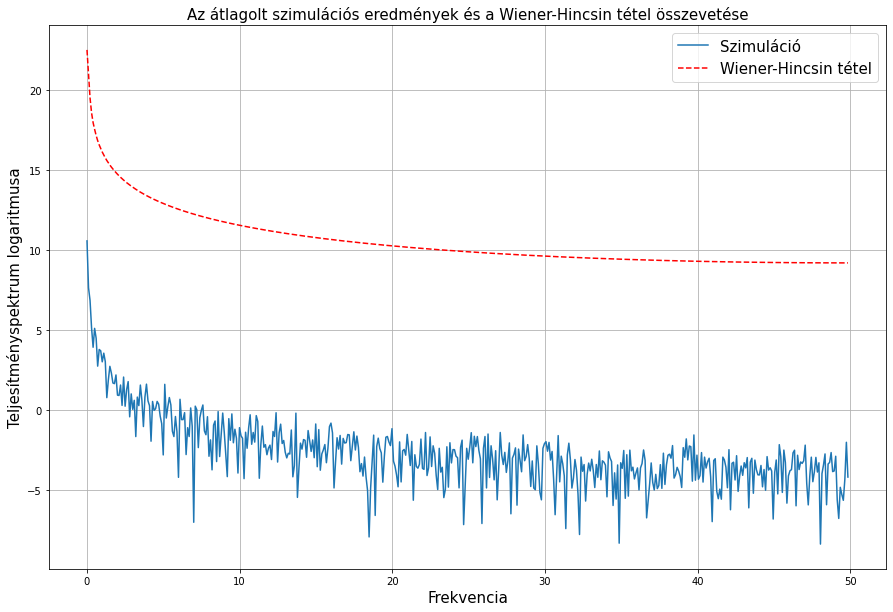

In [122]:
plt.figure(figsize=(15, 10))

plt.plot(positive_frequencies2mert, np.log(power_spectrum_positive2mert), label="Szimuláció")
plt.plot(positive_frequencies2szim, np.log(power_spectrum_positive2szim), "r--", label="Wiener-Hincsin tétel")

plt.xlabel('Frekvencia', fontsize='15')
plt.ylabel('Teljesítményspektrum logaritmusa', fontsize='15')
plt.title('Az átlagolt szimulációs eredmények és a Wiener-Hincsin tétel összevetése', fontsize='15')
plt.legend(fontsize='15')
plt.grid()
plt.show()

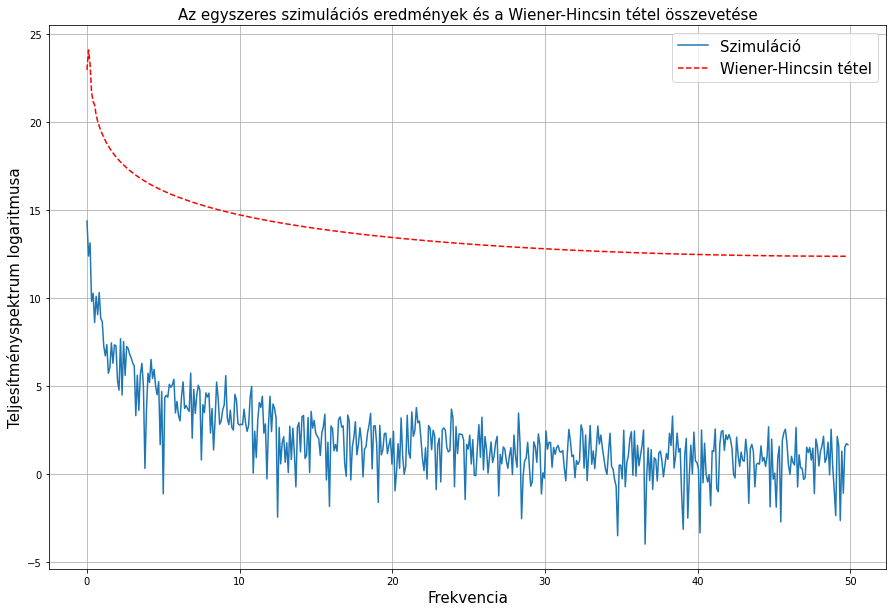

In [123]:
#Az egyszeres szimulációk összehasonlítása

plt.figure(figsize=(15, 10))

plt.plot(positive_frequencies1mert, np.log(power_spectrum_positive1mert), label="Szimuláció")
plt.plot(positive_frequencies4szim, np.log(power_spectrum_positive4szim), "r--", label="Wiener-Hincsin tétel")

plt.xlabel('Frekvencia', fontsize='15')
plt.ylabel('Teljesítményspektrum logaritmusa', fontsize='15')
plt.title('Az egyszeres szimulációs eredmények és a Wiener-Hincsin tétel összevetése', fontsize='15')
plt.legend(fontsize='15')
plt.grid()
plt.show()

In [124]:
#Látható, hogy a függvényalakok hasonlóak, ám a Wienr-Hincsin tétel által megadott elméleti érték nagyobb értékeket vesz fel 
#a teljesítményspektrumon.

#Az átlagolt eredmény esetén a Wiener-Hincsin tétel által megadott eredmény és a szimulált eredmény közötti eltérés 
#kisebb, mint abban az esetben, amikor kizárólag egy eseményt vizsgálunk.



## <font color='green5'>5. Szorgalmi feladatrész: Kaotikus rendszer vizsgálata</font>

A kaotikus rendszerek  a véletlen folyamatok egy másik példáját mutatjál. Ebben az esetben a rendszert leíró  egyenlet teljesen determinisztikus, hosszú távon mégis véletlenszerű viselkedést tapasztalhatunk.

A logisztikus leképezés az egyik legegyszerűbb kaotikus viselkedést mutató rendszer, melyet a következő iteratív formula definiál (az érdeklődőbbek olvashatnak [róla itt](https://en.wikipedia.org/wiki/Logistic_map)):

$$
x_{t + 1} = r \, x_t \left( 1 - x_t \right)
$$

Az $r$ érték egy ún. kontrollparaméter, amelytől függ, hogy a rendszer milyen viselkedést mutat, pl. hosszú távon periodikussá válik, vagy kaotikus viselkedést mutat. A kaotikus viselkedés $r_c \approx 3.56995$ és a maximális $r_{max}=4$ érték között figyelhető meg. Ezt a kaotikus viselkedést megszakítják olyan intervallumok, u.n. periódikus ablakok, ahol periódikus viselkedés figyelhető meg, amint a kinagyított [bifurkációs diagramon](https://en.wikipedia.org/wiki/Logistic_map#/media/File:Subsection_Bifurcation_Diagram_Logistic_Map.png)
jól látszik. A bifurkációs diagram a paraméter függvényében mutatja, hogy az egyes paraméterértékeknél a rendszer hosszútávú viselkedése során milyen $x$ értékeket jár be.
E rendszer az $r_{max}$ értéknél a legerősebben kaotikus.

A kaotikus rendszerek egy részének érdekes jellemzője, hogy bizonyos kontrollparaméter mellett ún. [intermittens](https://en.wikipedia.org/wiki/Intermittency) viselkedést mutatnak. Ilyenkor a rendszer váratlanul hosszabb vagy rövidebb ideig közel periodikus viselkedést mutat, majd idővel újra beáll a káosz, és ez a kettő váltakozik.
Ilyen a logisztikus leképezésben a periódikus ablakoktól kevéssel balra figyelhető meg, pl. $r=3.828$ értéknél, de $r$ értékét tovább csökkentve $r=3.8$-nál már ez a jelenség lényegében eltűnt.

Feladatok:

a) Írjunk függvényt, mely megvalósítja a fent definiált logisztikus leképezést.
Ábrázoljuk a folyamatot az $r$ kontrollparaméter néhány különböző értéke mellett.
Válasszuk ehhez a fent említett erősen kaotikus és intermittens esetet, és keressünk egy-egy hozzájuk hasonlót!

b) Bővítsük az előbbi vizsgálatokat az autokovariancia függvény meghatározásával, és ábrázoljuk, hogyan cseng le a korreláció ezekben az esetekben!

In [ ]:
# a)
# A logisztikus leképezést megvalósító függvény

In [ ]:
# a,b)
# A logisztikus leképezés tulajdonságainak vizsgálata